# Sales

## Extract-Transform-Load

**Team 2**
- Ana Zeledon
- Diana Prescura
- Katelin Catton
- Natalia Boiko 

# KATELIN STARTS FROM HERE

## Data Extraction

Source of the data: https://www.kaggle.com/datasets/ruchi798/shopping-cart-database.

## Data Transformation

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [3]:
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=Warning)
#InteractiveShell.ast_node_interactivity = 'all'

#%reload_ext autoreload
#%autoreload 2
#%matplotlib inline

#def set_seed(seed=42):
    #np.random.seed(seed)
    #os.environ["PYTHONHASHSEED"] = str(seed)
#set_seed()

#pd.set_option("display.width", 100)
#pd.set_option("display.max_columns", 50)
#pd.set_option("display.max_rows", 30)

## Read CSV Files

In [4]:
customers = pd.read_csv('../Data/customers.csv')
orders = pd.read_csv('../Data/orders.csv')
products = pd.read_csv('../Data/products.csv')
sales = pd.read_csv('../Data/sales.csv')

In [5]:
customers.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


In [6]:
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [7]:
products.head()

,product_id,product_type,product_name,size,colour,price,quantity
0,0,Shirt,Oxford Cloth,XS,red,114,66
1,1,Shirt,Oxford Cloth,S,red,114,53
2,2,Shirt,Oxford Cloth,M,red,114,54
3,3,Shirt,Oxford Cloth,L,red,114,69
4,4,Shirt,Oxford Cloth,XL,red,114,47


In [8]:
# Delete unnecessary columns: description column in products.csv file

# Delete the "description" column
#products.drop("description", axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file
#products.to_csv("Data/products.csv", index=False)

In [9]:
sales.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339


## Merge Data

In [10]:
co_data = pd.merge(left=customers, right=orders, 
                      left_index=True, right_index=True) 
customers_merged = pd.merge(left=co_data, right=products, 
                    left_index=True, right_index=True)

In [11]:
customers_merged

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,payment,order_date,delivery_date,product_id,product_type,product_name,size,colour,price,quantity
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42


In [12]:
customers_merged.isnull().sum()

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
customer_id_y    0
payment          0
order_date       0
delivery_date    0
product_id       0
product_type     0
product_name     0
size             0
colour           0
price            0
quantity         0
dtype: int64

In [13]:
sales.isnull().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

In [14]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_id     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


In [16]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


In [17]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")

customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [18]:
# Find Outliers

# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Calculate the IQR for each column
Q1 = customers_merged[num_cols].quantile(0.25)
Q3 = customers_merged[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = customers_merged[(customers_merged[col] < outlier_lower_bound[col]) | (customers_merged[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price': 0
Number of outliers in 'quantity': 0


<AxesSubplot: >

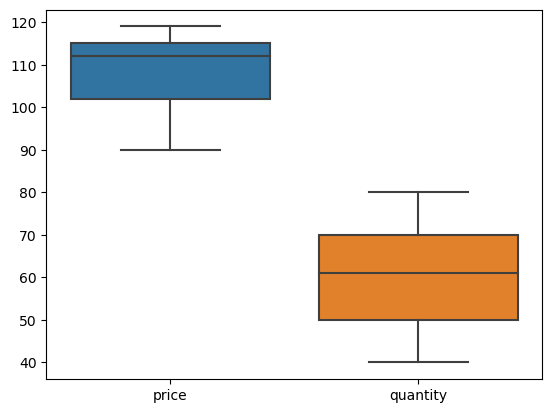

In [19]:
# Select the columns with numerical data
num_cols = ['price', 'quantity']

# Convert the data type of the 'age' column to float
customers_merged['age'] = customers_merged['age'].astype(float)

# Create a box plot for the selected columns
sns.boxplot(data=customers_merged[num_cols])

In [20]:
# Select the columns with numerical data
num_cols = ['price_per_unit', 'quantity', 'total_price']

# Calculate the IQR for each column
Q1 = sales[num_cols].quantile(0.25)
Q3 = sales[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
outlier_upper_bound = Q3 + 1.5 * IQR
outlier_lower_bound = Q1 - 1.5 * IQR

# Identify outliers in each column
outliers = {}
for col in num_cols:
    outliers[col] = sales[(sales[col] < outlier_lower_bound[col]) | (sales[col] > outlier_upper_bound[col])]
    print(f"Number of outliers in '{col}': {len(outliers[col])}")


Number of outliers in 'price_per_unit': 0
Number of outliers in 'quantity': 0
Number of outliers in 'total_price': 0


<Figure size 800x600 with 0 Axes>

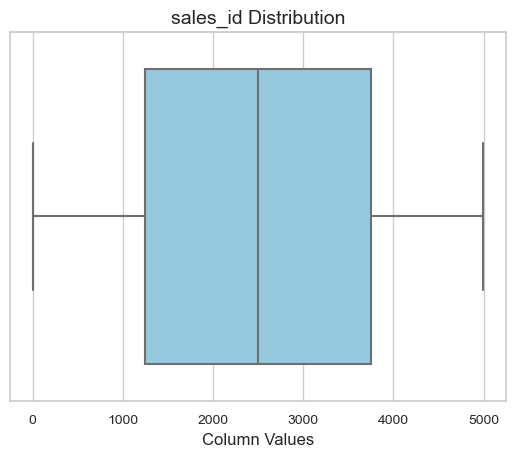

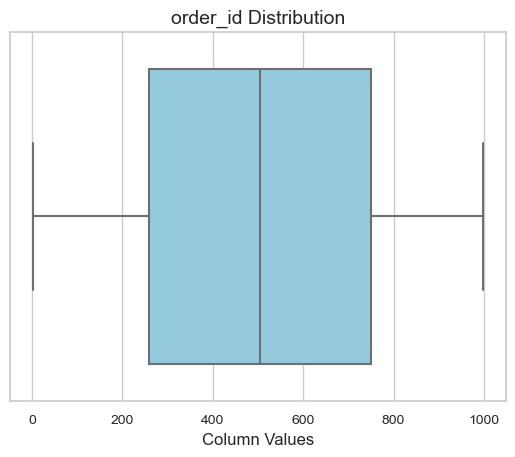

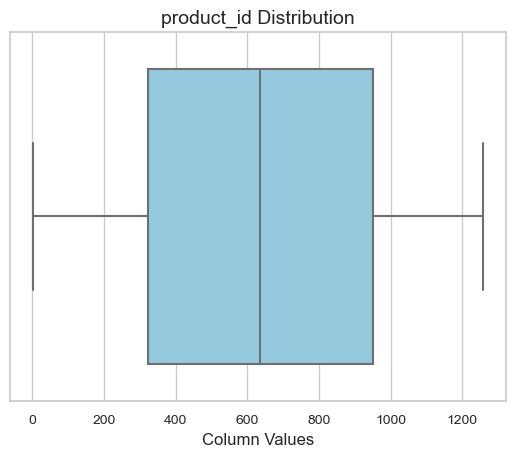

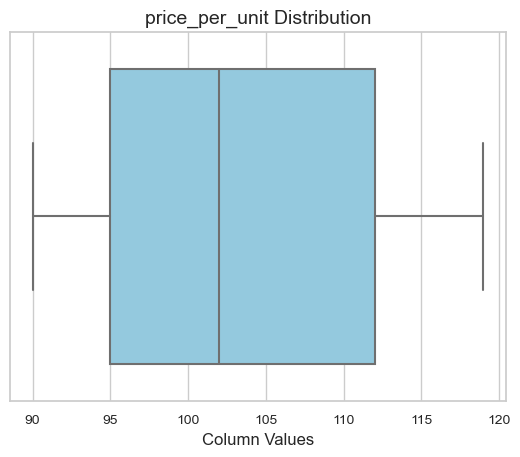

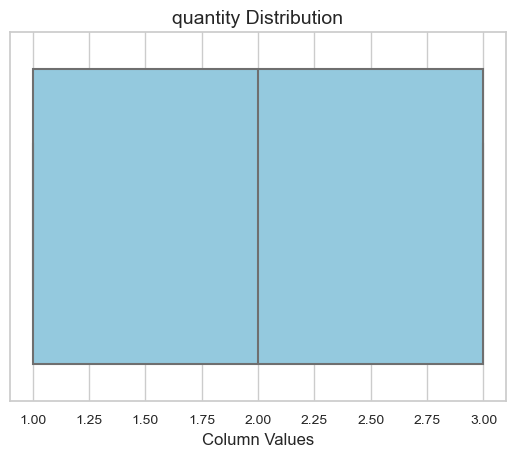

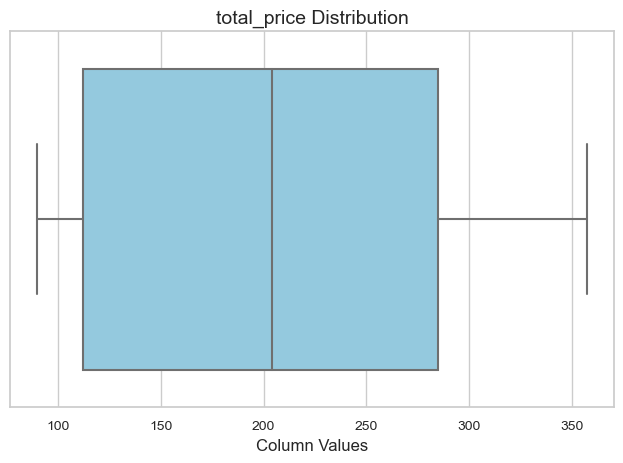

In [21]:
# Set figure size and style
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

# Create a boxplot for each numeric column to identify outliers
for col in sales.select_dtypes(include=['int64', 'float64']).columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=sales[col], color='skyblue')
    ax.set_title(f"{col} Distribution", fontsize=14)
    ax.set_xlabel("Column Values", fontsize=12)
    ax.tick_params(labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Check for inconsistent data in the 'gender' column
unique_values = customers_merged['gender'].unique()
print("Unique values in 'gender' column: ", unique_values)

# Check for any inconsistent values in 'gender' column
inconsistent_values = [val for val in customers_merged['gender'] if val not in unique_values]
if len(inconsistent_values) > 0:
    print("Inconsistent values in 'gender' column: ", inconsistent_values)
else:
    print("No inconsistent values found in 'gender' column.")

Unique values in 'gender' column:  ['Female' 'Genderfluid' 'Polygender' 'Bigender' 'Agender' 'Male'
 'Genderqueer' 'Non-binary']
No inconsistent values found in 'gender' column.


In [23]:
# Detecting inconsistent data entry for age column
age_stats = customers_merged['age'].describe()
age_range = age_stats['max'] - age_stats['min']
age_q1, age_q3 = np.percentile(customers_merged['age'], [25, 75])
age_iqr = age_q3 - age_q1
age_upper_bound = age_q3 + 1.5 * age_iqr
age_lower_bound = age_q1 - 1.5 * age_iqr

# Identifying rows with inconsistent age values
inconsistent_age_rows = customers_merged[(customers_merged['age'] < age_lower_bound) | (customers_merged['age'] > age_upper_bound)]

# Printing out the number of rows with inconsistent age values
print(f"Number of rows with inconsistent age values: {len(inconsistent_age_rows)}")

Number of rows with inconsistent age values: 0


In [24]:
#Find numeric variables

numeric = customers_merged.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {customers_merged[num_col].nunique()}")


customer_id_x : 1000
age : 61
zip_code : 955
order_id : 1000
customer_id_y : 617
payment : 995
product_id : 1000
price : 21
quantity : 41


In [25]:
#Find categorical variables

categorical = customers_merged.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {customers_merged[cat_col].nunique()}")

customer_name : 1000
gender : 8
home_address : 1000
city : 961
state : 8
country : 1
order_date : 291
delivery_date : 305
product_type : 3
product_name : 28
size : 5
colour : 7


# DIANA STARTS FROM HERE

In [26]:
customers_merged.loc[:, ['age','payment', 'price', 'quantity']].describe()

,age,payment,price,quantity
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.860000,33972.936000,108.095000,60.371000
std,17.647828,14451.609047,9.158048,11.606812
min,20.000000,10043.000000,90.000000,40.000000
25%,34.000000,21329.250000,102.000000,50.000000
50%,50.000000,33697.500000,112.000000,61.000000
75%,65.000000,46249.000000,115.000000,70.000000
max,80.000000,59910.000000,119.000000,80.000000


In [27]:
# Create sales column
customers_merged["sales"] = customers_merged["price"] * customers_merged["quantity"] 

In [28]:
customers_merged['order_date'] = pd.to_datetime(customers_merged['order_date'])

In [29]:
# Create Year Column
customers_merged['year_order'] = customers_merged['order_date'].dt.year

# Create Month Column
customers_merged['month_order'] = customers_merged['order_date'].dt.month

# Create Day Column
customers_merged["day_order"] = customers_merged["order_date"].dt.day

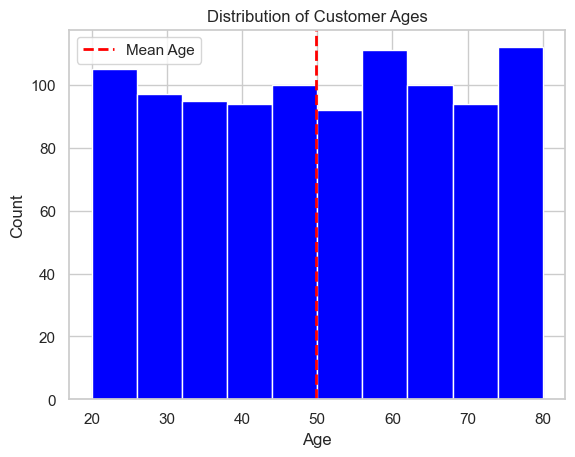

In [30]:
# What is the distribution of customer ages in the data set?

mean_age = customers['age'].mean()

plt.hist(customers_merged['age'], bins=10, color='blue')
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label='Mean Age')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [31]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


C:\Users\valer\AppData\Local\Temp\ipykernel_22624\622892079.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


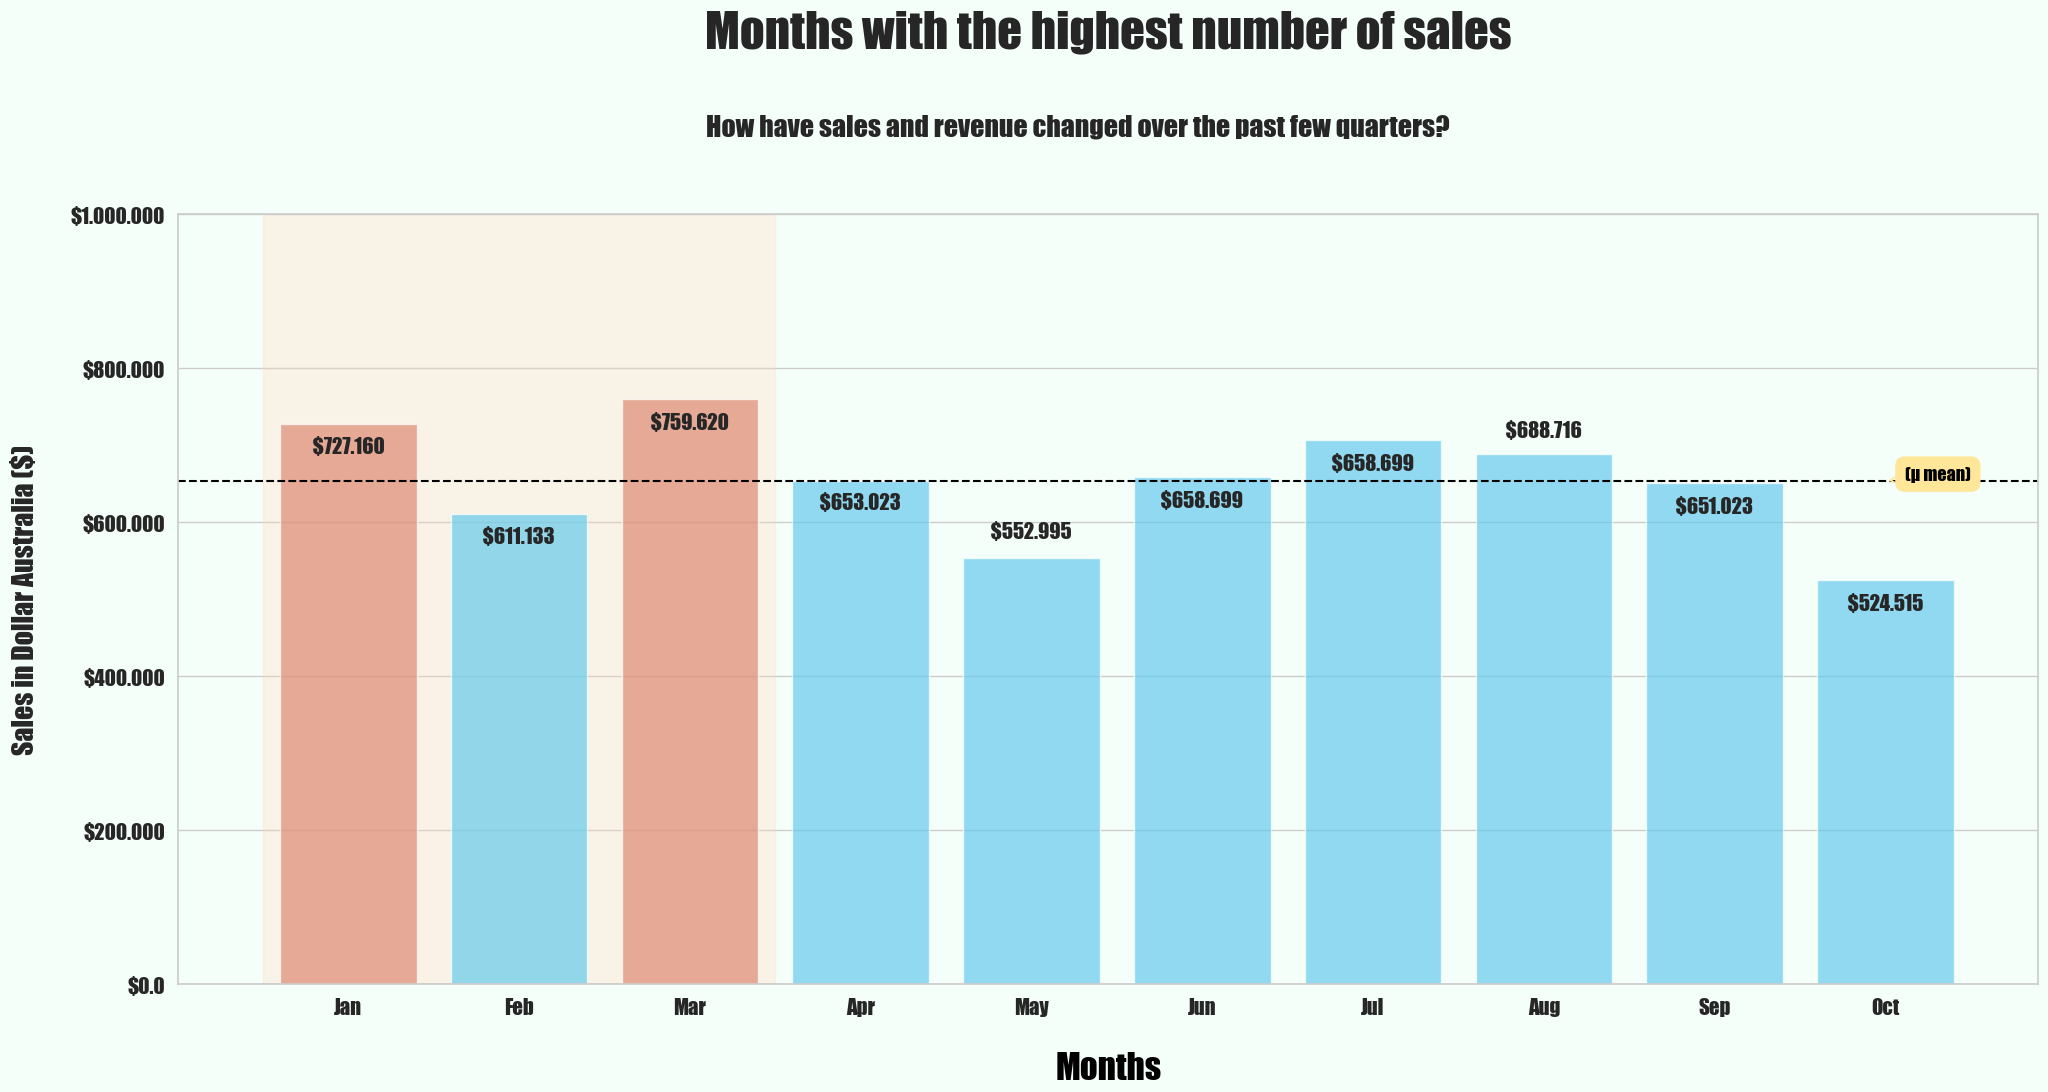

In [32]:
# set-up
color_map = ["#5FCDF5" for _ in range(20)]
color_map[0] = "#E3866F"
color_map[2] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [-0.5, 2.5]

# group the Month cols
sum_month_order = customers_merged.groupby(["month_order"]).sum().astype("int")

# let's plot it
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 10), 
    facecolor="mintcream")

# makes bar plot 
sns.barplot(
    x=sum_month_order.index,
    y=sum_month_order["sales"], 
    data=sum_month_order,
    zorder=2,
    palette=color_map,
    saturation=.9,
    alpha=.7,
    ax=ax) 

# title 
ax.set_title(
    "Months with the highest number of sales", 
    fontname="fantasy", 
    weight="bold", 
    fontsize=35, 
    pad=120)

plt.suptitle(
    "How have sales and revenue changed over the past few quarters?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel( 
    "Months", 
    weight="bold", 
    color="black",
    family="fantasy",
    fontsize=25, 
    loc="center",
    labelpad=25)
ax.set_ylabel(
    "Sales in Dollar Australia ($)", 
    weight="bold", 
    family="fantasy",
    fontsize=20,
    labelpad=25)

# ticklabels
ax.set_xticklabels( 
    labels=["Jan", "Feb", "Mar", "Apr", "May", 
            "Jun", "Jul", "Aug", "Sep", "Oct"],
    weight="bold", 
    family="fantasy",
    fontsize=15)
ax.set_yticklabels( 
    labels=["$0.0", "$200.000", "$400.000", 
            "$600.000", "$800.000", "$1.000.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# y-limit
ax.set_ylim(0, 1000000)

# face-color
ax.set_facecolor("mintcream")

# text 
ax.text(0, 765000-66000, " $727.160 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(1, 648500-66000, " $611.133 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(2, 797200-66000, " $759.620 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(3, 693000-66000, " $653.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(4, 589000, " $552.995 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(5, 696000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(6, 743000-66000, " $658.699 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(7, 719900, " $688.716 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(8, 688000-66000, " $651.023 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

ax.text(9, 562000-66000, " $524.515 ", va="center", ha="center", 
        family="fantasy", weight="bold", fontsize=15)

# annotate
ax.annotate("(μ mean)", xy=(9, sum_month_order["sales"].mean()), 
             xytext=(9.5, sum_month_order["sales"].mean() + 9000),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(
    span_range[0], 
    span_range[1], 
    color="peachpuff", 
    alpha=0.3)

# axh-line
ax.axhline(
    y=sum_month_order["sales"].mean(), 
    color="black", 
    ls="--", 
    lw=1.5);

In [33]:
### set-up
labels = ["0-30yo", "31-40yo", "41-50yo", "51-60yo", "61-70yo", "71-80yo"]
bins= [30, 31, 41, 51, 61, 71, 80]
customers_merged["age_group"] = pd.cut(customers_merged["age"], bins=bins, labels=labels, right=False)
sum_total_age = [660,  5652,  7382,  9209, 10890, 10883]
sum_age_group = pd.DataFrame({"age": labels, "sum_total_age": sum_total_age})
color_map = ["#5FCDF5" for _ in range(6)]
color_map[5] = "#E3866F"
color_map[4] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
span_range = [3.5, 5.5]
span_range2 = [[-0.15, 0.14], 
               [0.85, 1.14], 
               [1.85, 2.14], 
               [2.85, 3.14], 
               [3.85, 4.14], 
               [4.85, 5.14]]

C:\Users\valer\AppData\Local\Temp\ipykernel_22624\1299339214.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_22624\1299339214.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_22624\1299339214.py:85: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=None, which="major", axis="x")


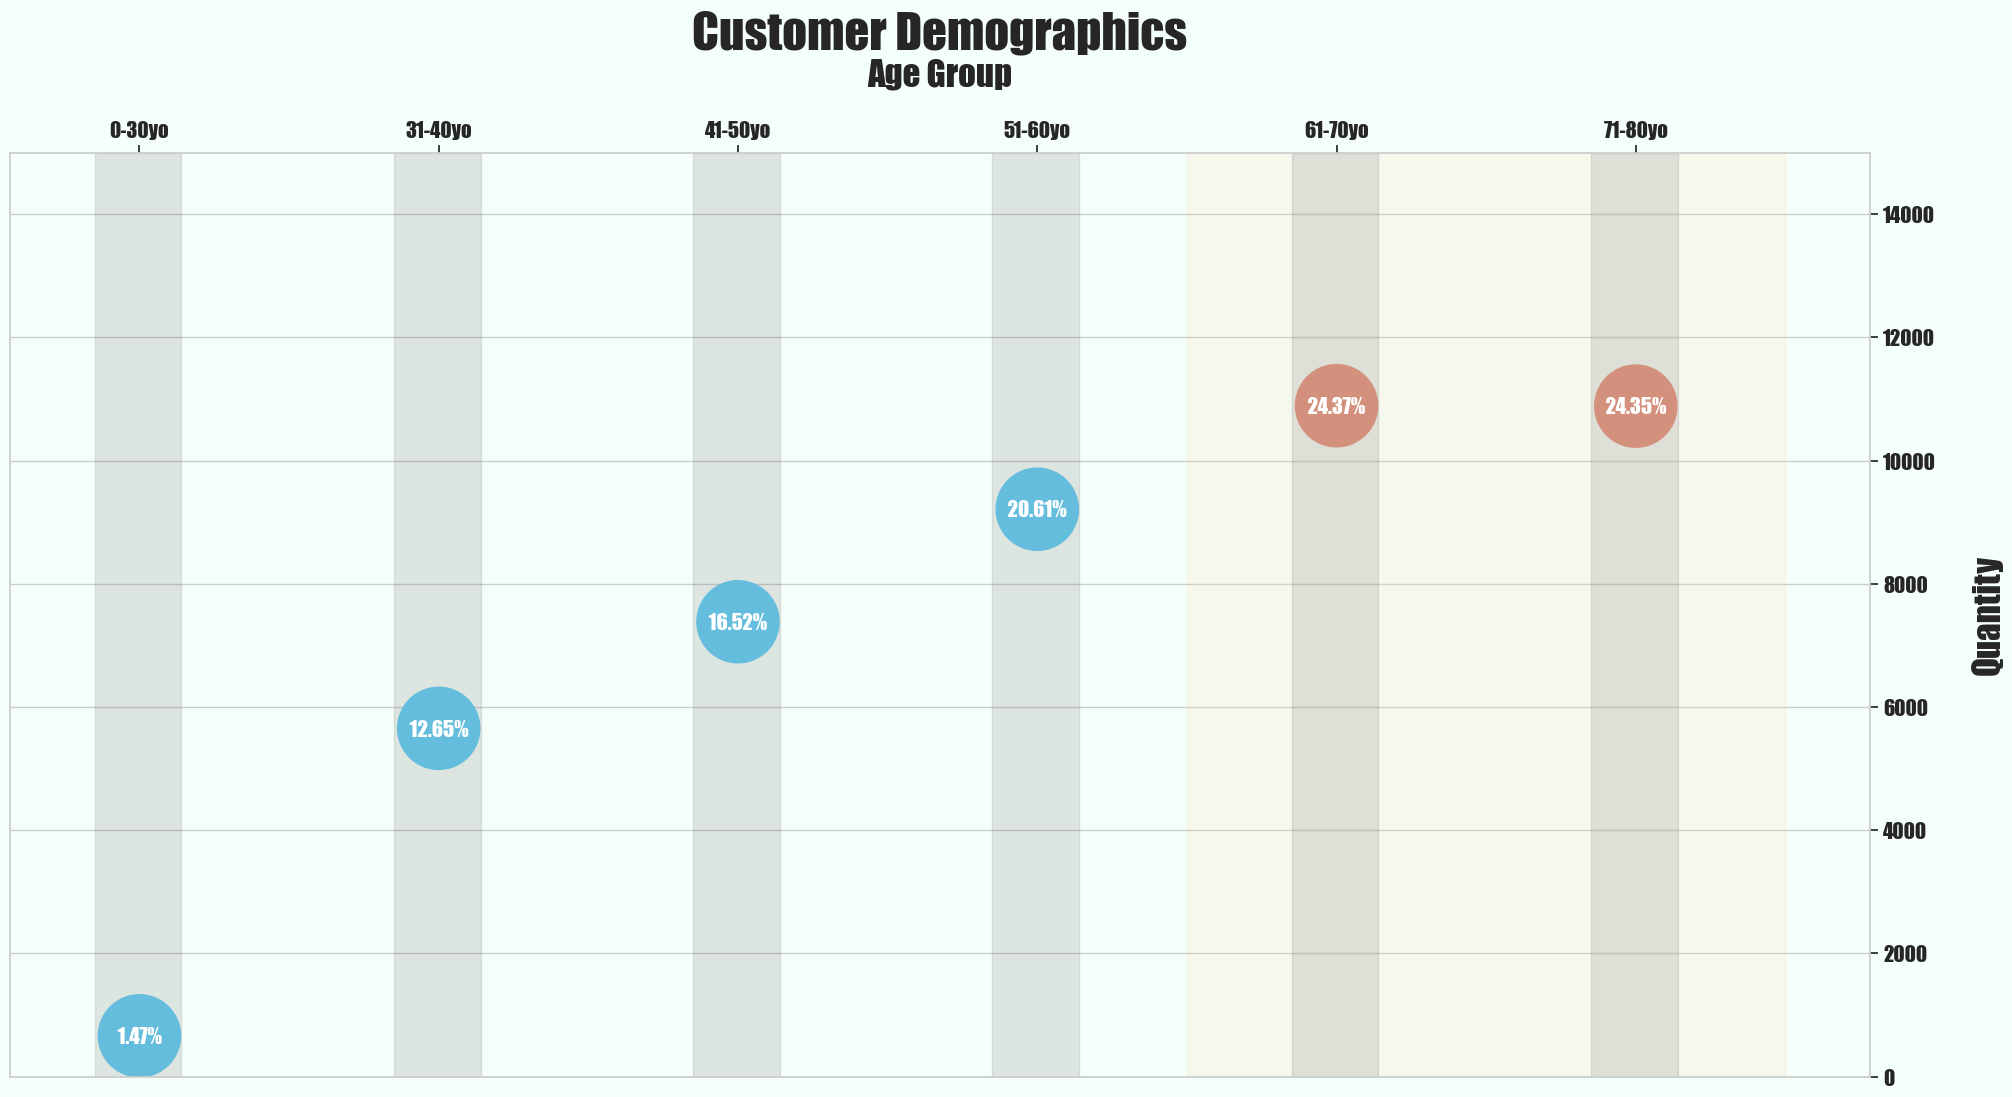

In [34]:
# subplots
fig, ax = plt.subplots(
    1, 1, 
    figsize=(24, 12), 
    facecolor=("mintcream"))

# countplot
ax.scatter(
    sum_age_group["age"], 
    sum_age_group["sum_total_age"], 
    color=color_map,
    s=3500,
    zorder=1)

# title
ax.set_title(
    "Customer Demographics", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=75)

# axv-span
ax.axvspan(span_range[0], span_range[1], color="peachpuff", alpha=0.2)
ax.axvspan(span_range2[0][0], span_range2[0][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[1][0], span_range2[1][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[2][0], span_range2[2][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[3][0], span_range2[3][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[4][0], span_range2[4][1], color="gray", alpha=0.2)
ax.axvspan(span_range2[5][0], span_range2[5][1], color="gray", alpha=0.2)
# labels
ax.set_xlabel(
    "Age Group", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)
ax.set_ylabel(
    "Quantity", 
    weight="bold", 
    family="fantasy", 
    fontsize=25,
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=labels, 
    weight="bold", 
    fontsize=15,
    family="fantasy")
ax.set_yticklabels(
    labels=list(np.arange(0, 16000, 2000)), 
    weight="bold", 
    fontsize=15,
    family="fantasy")

# text
ax.text(0, 660, " 1.47% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(1, 5652, " 12.65% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(2, 7382, " 16.52% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(3, 9209, " 20.61% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(4, 10890, " 24.37% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

ax.text(5, 10883, " 24.35% ", va="center", ha="center", 
         fontsize=15, c="white", family="fantasy", weight="semibold")

# adjust ticks
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")

# y-limit
ax.set_ylim(0, 15000)

ax.grid(b=None, which="major", axis="x")

# face-color
ax.set_facecolor("mintcream");

C:\Users\valer\AppData\Local\Temp\ipykernel_22624\1014205532.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\valer\AppData\Local\Temp\ipykernel_22624\1014205532.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


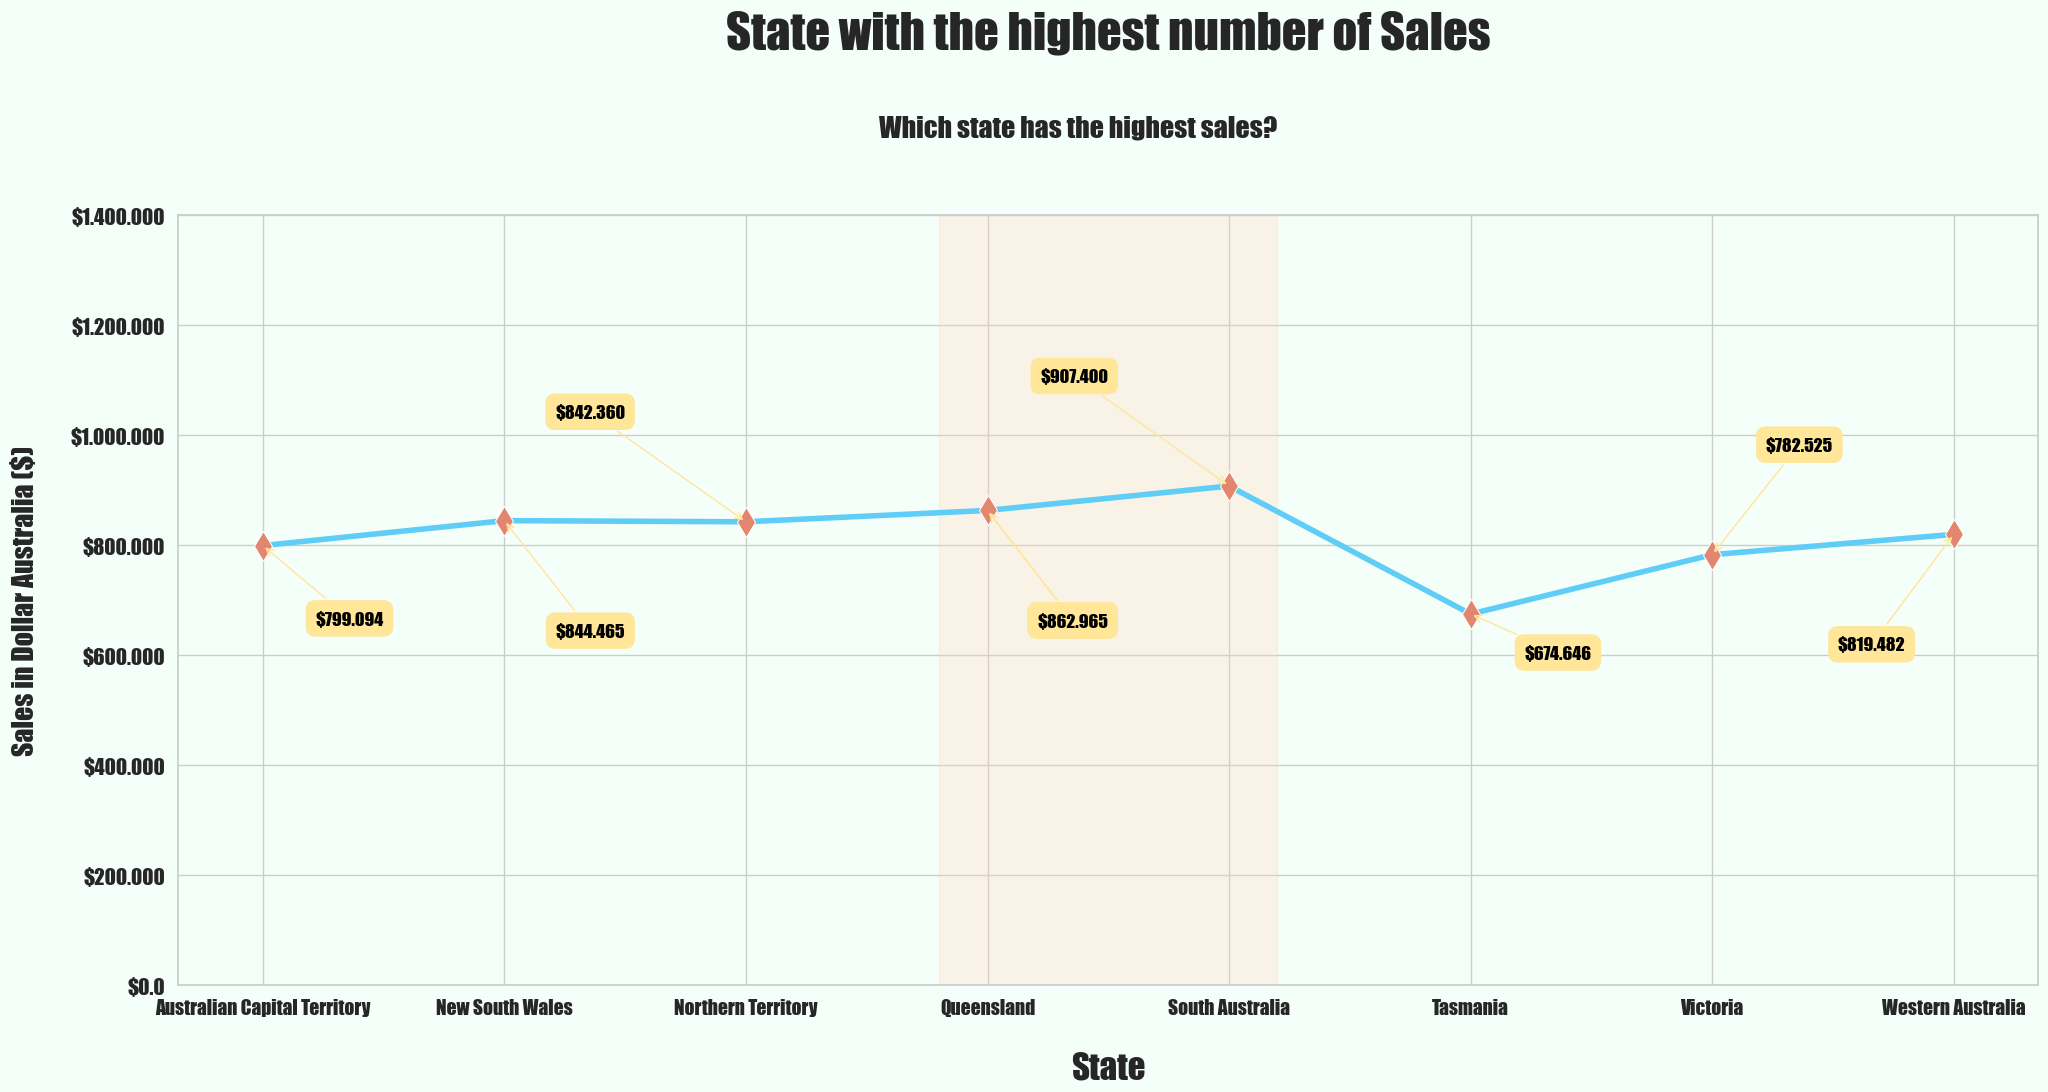

In [35]:
# set-up
color_map = ["#5FCDF5" for _ in range(8)]
color_map[4] = color_map[3] = "#E3866F"
sns.set_palette(sns.color_palette(color_map))
state = ['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland',
         'South Australia', 'Tasmania', 'Victoria', 'Western Australia']
values = [799094, 844465, 842360, 862965, 907400, 674646, 782525, 819482]
state_sales = pd.DataFrame({"state": state, "values": values})
span_range = [2.8, 4.2]

# let's plot it
fig, ax = plt.subplots(
    1, 1,
    figsize=(24, 10),
    facecolor="mintcream")

# makes bar plot 
sns.lineplot(
    x=state_sales["state"],
    y=state_sales["values"],
    data=state_sales,
    marker="d",
    markersize=15,
    markerfacecolor="#E3866F",
    lw=4,
    color="#5FCDF5",
    ax=ax)

# title
ax.set_title( # title
    "State with the highest number of Sales", 
    fontname="fantasy",
    weight="bold",
    fontsize=35,
    pad=120)
plt.suptitle(
    "Which state has the highest sales?", 
    fontname="fantasy",
    weight="bold",
    fontsize=20)

# labels
ax.set_xlabel(
    "State", 
    family="fantasy",
    weight="bold",
    fontsize=25,
    loc="center",
    labelpad=25)
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    family="fantasy",
    weight="bold",
    fontsize=20, 
    loc="center",
    labelpad=25)

# ticklabels
ax.set_xticklabels(
    labels=state_sales["state"],
    weight="bold", 
    fontsize=14, 
    family="fantasy",
    rotation=0)
ax.set_yticklabels(
    labels=["$0.0",     "$200.000",
            "$400.000", "$600.000",
            "$800.000", "$1.000.000",
            "$1.200.000", "$1.400.000"],
    weight="bold",
    family="fantasy",
    fontsize=15)

# annotate
ax.annotate("$799.094", xy=(0, 799094), xytext=(0.5, 666666),
             size=13, ha='right', va="center", color="black", 
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$844.465", xy=(1, 844465), xytext=(1.5, 644465),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$842.360", xy=(2, 842360), xytext=(1.5, 1042360),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$862.965", xy=(3, 862965), xytext=(3.5, 662965),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$907.400", xy=(4, 907400), xytext=(3.5, 1107400),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$674.646", xy=(5, 674646), xytext=(5.5, 604646),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$782.525", xy=(6, 782525), xytext=(6.5, 982525),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

ax.annotate("$819.482", xy=(7, 819482), xytext=(6.8, 619482),
             size=13, ha='right', va="center", color="black",
             weight="semibold", family="fantasy",
             bbox=dict(boxstyle="round", pad=.5, color="#FFE699"),
             arrowprops=dict(arrowstyle="->", color="#FFE699"));

# axv-span
ax.axvspan(span_range[0], 
           span_range[1], 
           color="peachpuff", 
           alpha=0.3)

# facecolor
ax.set_facecolor("mintcream")

# y-limits
ax.set_ylim(0, 1400000);


In [36]:
# What is the average price of the products?

average_price = customers_merged['price'].mean()
print("Average price of products in products data set: ${:.2f}".format(average_price))

Average price of products in products data set: $108.09


In [37]:
# What is the range of order dates in the sales data set?

min_date = customers_merged['order_date'].min()
max_date = customers_merged['order_date'].max()

print("Range of order dates in sales data set: {}-{}".format(min_date, max_date))

Range of order dates in sales data set: 2021-01-01 00:00:00-2021-10-24 00:00:00


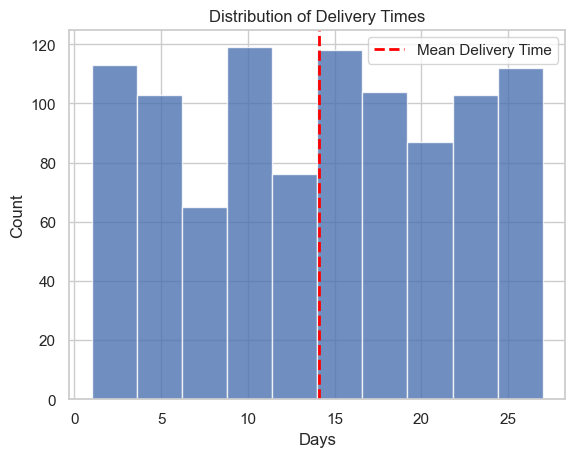

In [38]:
# What is the distribution of delivery times in the sales data set?

# Calculate delivery times and days
delivery_times = pd.to_datetime(customers_merged['delivery_date']) - pd.to_datetime(customers_merged['order_date'])
delivery_days = delivery_times.dt.days

# Calculate mean delivery time
mean_delivery_time = delivery_days.mean()

# Plot the histogram with vertical line for mean delivery time
plt.hist(delivery_days, bins=10, color='#4c72b0', alpha=0.8)
plt.axvline(mean_delivery_time, color='red', linestyle='--', linewidth=2, label='Mean Delivery Time')
plt.title('Distribution of Delivery Times')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.show()

In [39]:
# What is the range of quantities sold in the sales data set?

min_quantity = sales['quantity'].min()
max_quantity = sales['quantity'].max()

print("Range of quantities sold in sales data set: {}-{}".format(min_quantity, max_quantity))

Range of quantities sold in sales data set: 1-3


In [40]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated by the sales data set: ${:.2f}".format(total_revenue))

Total revenue generated by the sales data set: $1031800.00


In [41]:
# What is the most common product type in the product info data set?

most_common_product_type = customers_merged['product_type'].mode()[0]
print("Most common product type in the product info data set: ", most_common_product_type)

Most common product type in the product info data set:  Jacket


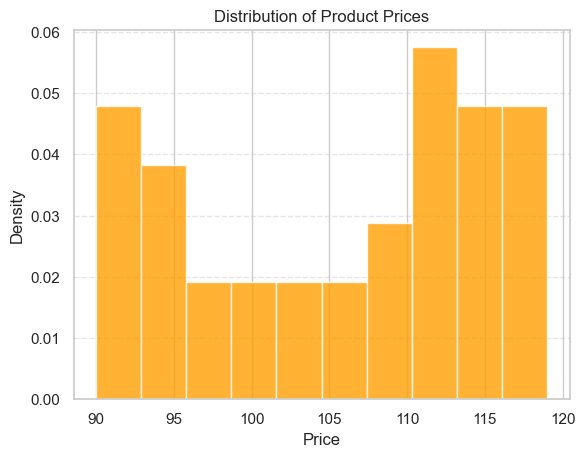

In [42]:
# What is the distribution of product prices in the product info data set?

# Plot the histogram with density curve and orange color scheme
plt.hist(products['price'], bins=10, density=True, color='#ff9f00', alpha=0.8)
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

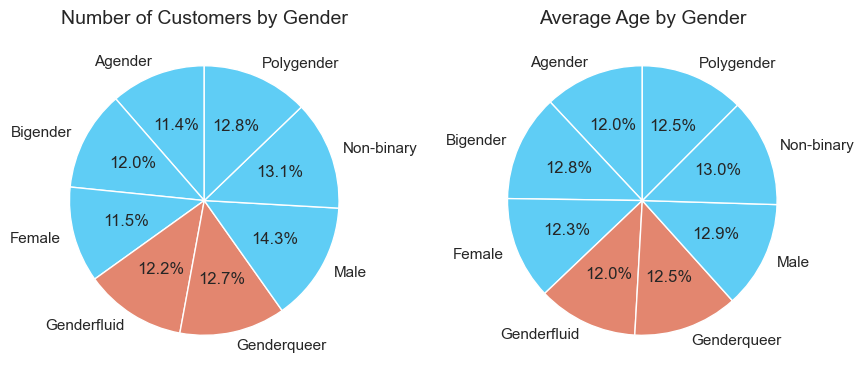

In [43]:
# Gender and age description

gender_grouped = customers_merged.groupby('gender')
gender_counts = gender_grouped.size()
gender_ages = gender_grouped['age'].mean()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Number of Customers by Gender', fontsize=14)

axs[1].pie(gender_ages.values, labels=gender_ages.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Average Age by Gender', fontsize=14)

plt.subplots_adjust(wspace=0.3)
plt.show()

In [44]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers['country'], columns=customers['gender'], normalize='index') * 100

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
country                                                                
Australia     11.4      12.0    11.5         12.2         12.7  14.3   

gender     Non-binary  Polygender  
country                            
Australia        13.1        12.8  


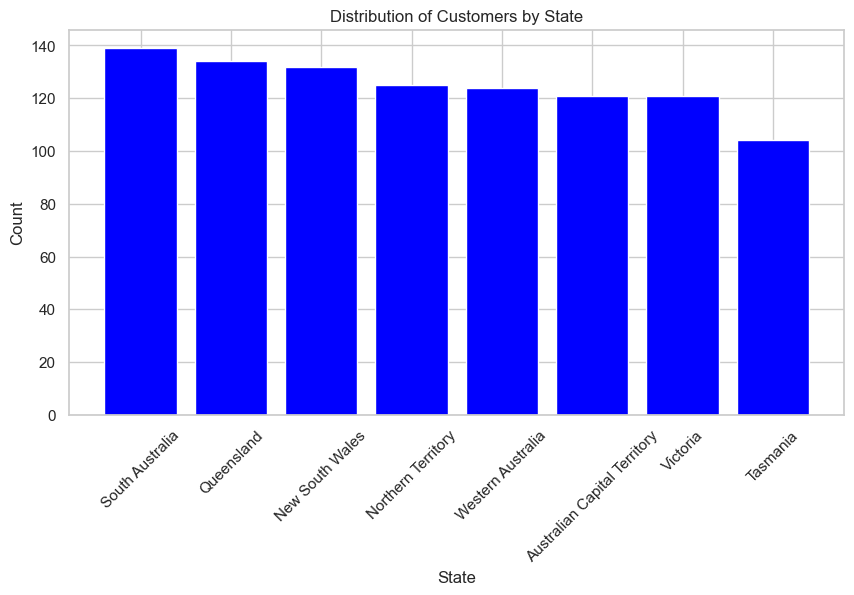

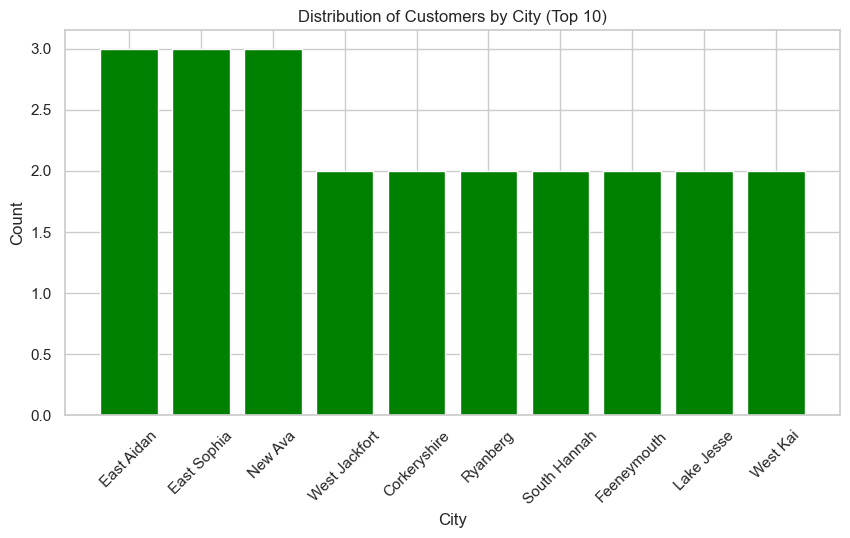

Number of Customers by Country:
country
Australia    1000
dtype: int64

Average Age of Customers by Country:
country
Australia    49.86
Name: age, dtype: float64

Percentage of Male and Female Customers by Country:
gender     Agender  Bigender  Female  Genderfluid  Genderqueer  Male  \
country                                                                
Australia     11.4      12.0    11.5         12.2         12.7  14.3   

gender     Non-binary  Polygender  
country                            
Australia        13.1        12.8  


In [45]:
# Count number of customers in each country
country_counts = customers_merged.groupby('country').size().sort_values(ascending=False)

# Calculate average age for customers in each country
country_ages = customers_merged.groupby('country')['age'].mean().sort_values(ascending=False)

# Calculate percentage of male and female customers in each country
gender_pct_by_country = pd.crosstab(index=customers_merged['country'], columns=customers_merged['gender'], normalize='index') * 100

# Distribution of customers by state
state_counts = customers_merged.groupby('state').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(state_counts.index, state_counts.values, color='blue')
plt.title('Distribution of Customers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of customers by city
city_counts = customers_merged.groupby('city').size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
plt.bar(city_counts.index, city_counts.values, color='green')
plt.title('Distribution of Customers by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Number of Customers by Country:")
print(country_counts)
print("\nAverage Age of Customers by Country:")
print(country_ages)
print("\nPercentage of Male and Female Customers by Country:")
print(gender_pct_by_country)

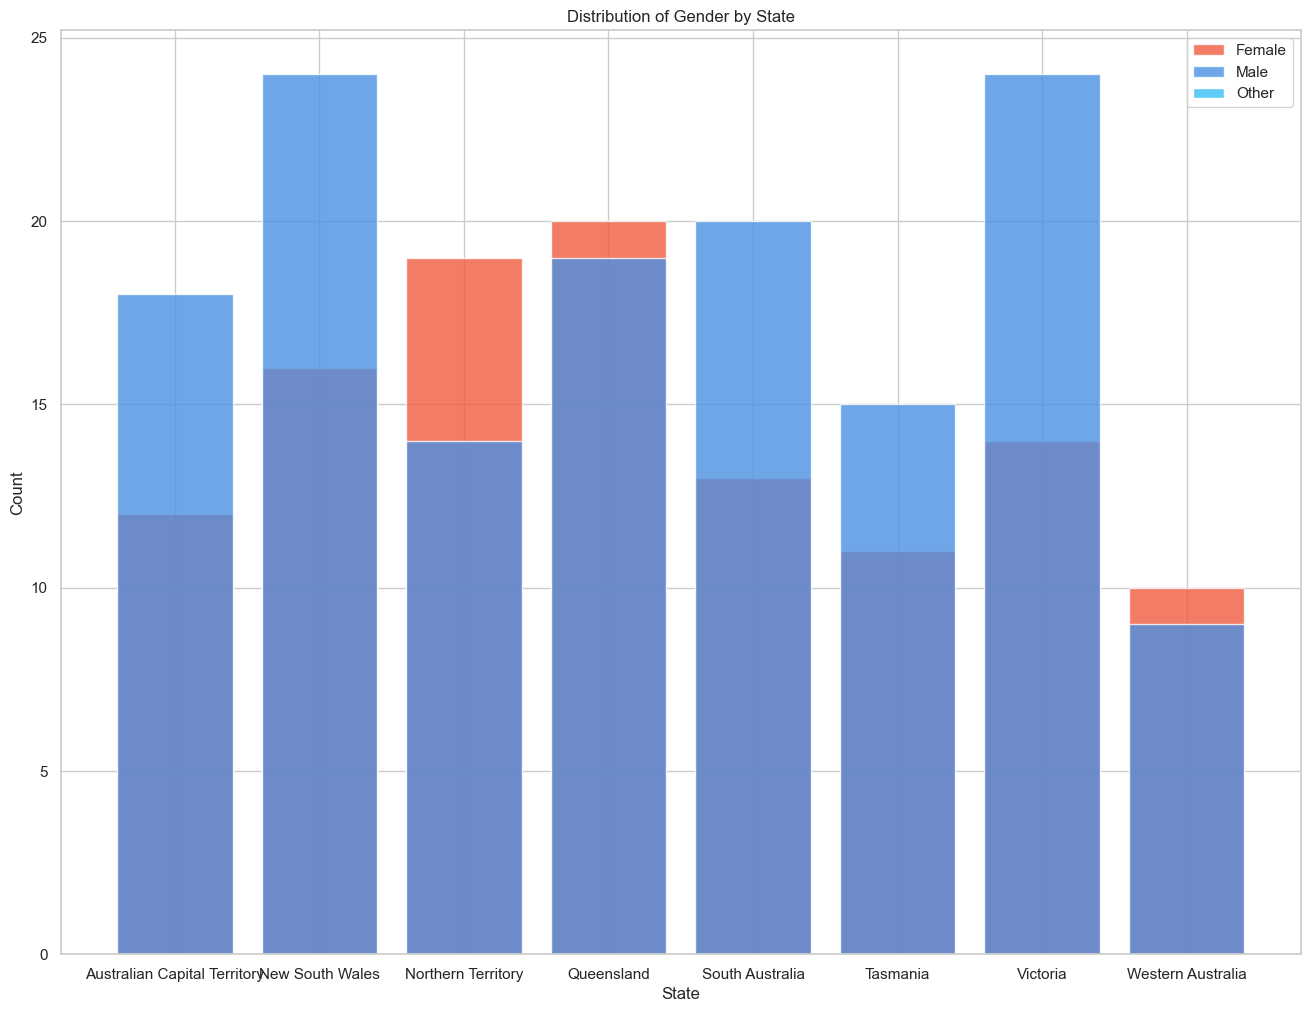

In [46]:
import matplotlib.pyplot as plt

# group customers by state and gender, and count the number of occurrences
state_gender_counts = customers_merged.groupby(['state', 'gender'])['customer_id_x'].count().reset_index()
state_gender_counts.columns = ['state', 'gender', 'count']

# plot the bar chart
fig, ax = plt.subplots(figsize=(16, 12))
for i, g in enumerate(['Female', 'Male', 'Other']):
    gender_counts = state_gender_counts[state_gender_counts['gender'] == g]
    ax.bar(gender_counts['state'], gender_counts['count'], label=g, alpha=0.8, color=['#F15B40', '#4A90E2', '#60BD68'][i])

# add labels and legend
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender by State')
ax.legend()

plt.show()

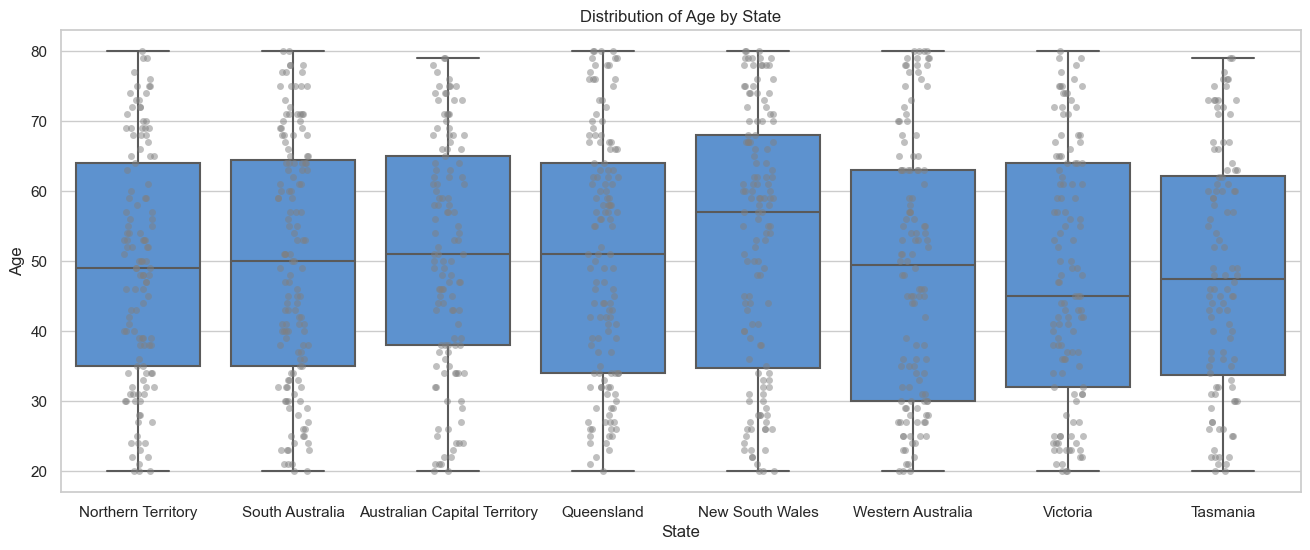

In [47]:
# plot the boxplot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='state', y='age', data=customers, ax=ax, color='#4A90E2')
sns.stripplot(x='state', y='age', data=customers, ax=ax, color='grey', alpha=0.5)

# add labels and title
ax.set_xlabel('State')
ax.set_ylabel('Age')
ax.set_title('Distribution of Age by State')

plt.show()

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


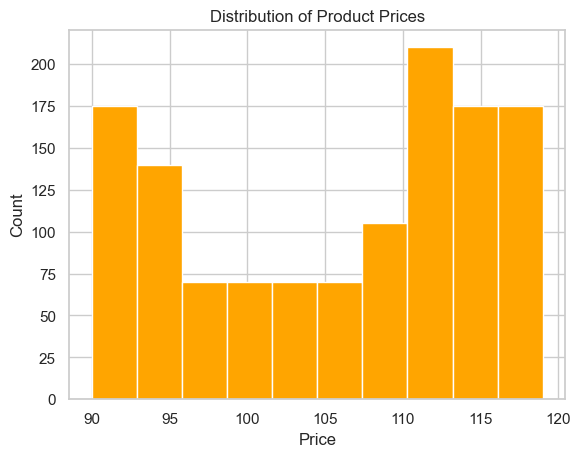

In [48]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()
print(product_type_counts)

# Plot the distribution of product prices
plt.hist(products['price'], bins=10, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

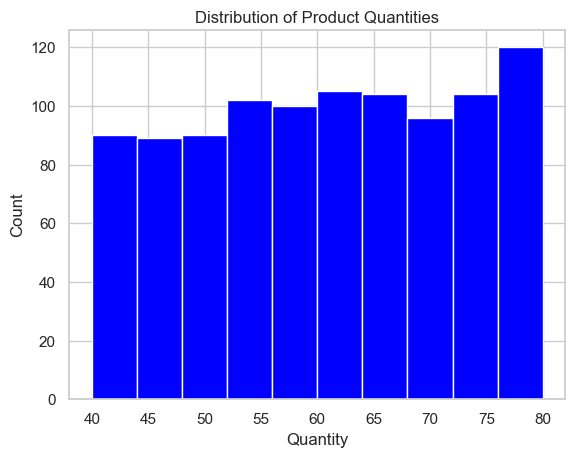

In [49]:
# Plot the distribution of product quantities
plt.hist(customers_merged['quantity'], bins=10, color='blue')
plt.title('Distribution of Product Quantities')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

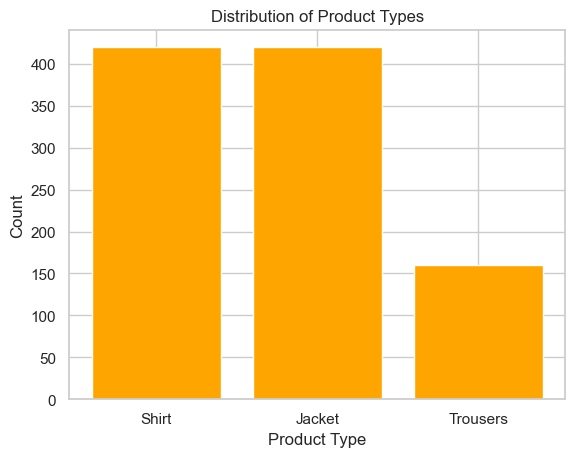

In [110]:
# Get the counts of each product type
product_type_counts = customers_merged['product_type'].value_counts()

# Plot the counts of each product type in a bar chart
plt.bar(product_type_counts.index, product_type_counts.values, color='orange')
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

In [111]:
# Print the counts of each product type
print(product_type_counts)

Shirt       420
Jacket      420
Trousers    160
Name: product_type, dtype: int64


# ANA STARTS FROM HERE

# Analysis

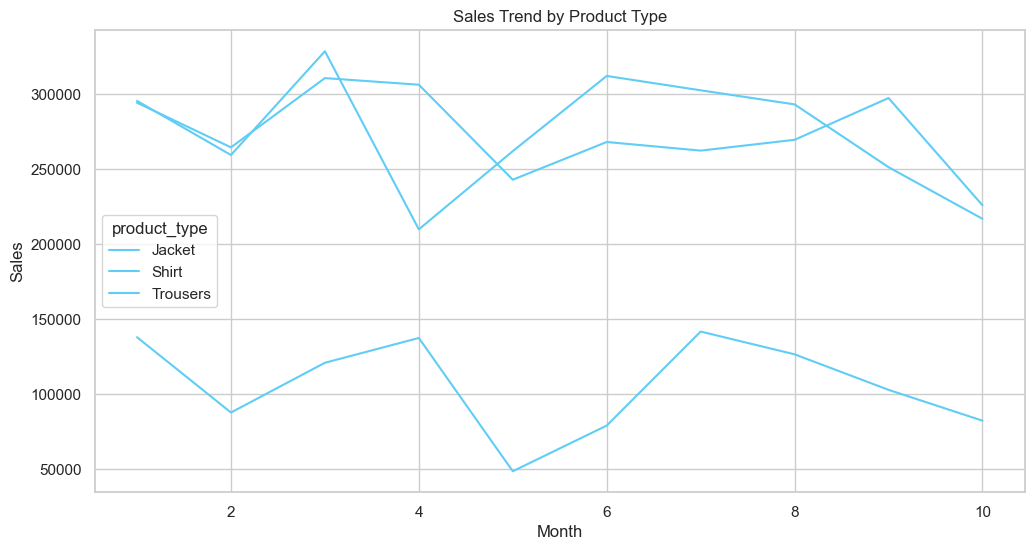

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# group sales by month, year and product type
sales_by_month = customers_merged.groupby(['month_order', 'product_type'])['sales'].sum().reset_index()

# pivot the table to make product types as columns
sales_by_month = sales_by_month.pivot(index=['month_order'], columns='product_type', values='sales').reset_index()

# plot the data
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_month.plot(x='month_order', ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales Trend by Product Type')
plt.show()



In [118]:
#sales_by_month.to_csv('sales_by_month.csv', index=False)

In [150]:
sales_by_month

product_type,month_order,Jacket,Shirt,Trousers
0,1,295309,294074,137777
1,2,259222,264330,87581
2,3,328397,310487,120736
3,4,209662,306092,137269
4,5,261800,242770,48425
5,6,311933,267904,78862
6,7,302349,262159,141545
7,8,292976,269367,126373
8,9,251130,297204,102689
9,10,216687,225699,82129


- The total sales of all three product types increased from February to March, and then decreased from March to April.

- Among the three product types, Jacket had the highest sales in the first and sixth months, whereas Shirt had the highest sales in the fourth and eighth months, and Trousers had the highest sales in the seventh month.

- Trousers had the lowest sales in most months, except in the fifth month where Shirt had the lowest sales.

- Overall, Jacket had the highest total sales across the 10 months, followed by Shirt and Trousers.

The month with the highest sales was 2021-03 with a total of $131,364.00
The month with the lowest sales was 2021-10 with a total of $84,266.00


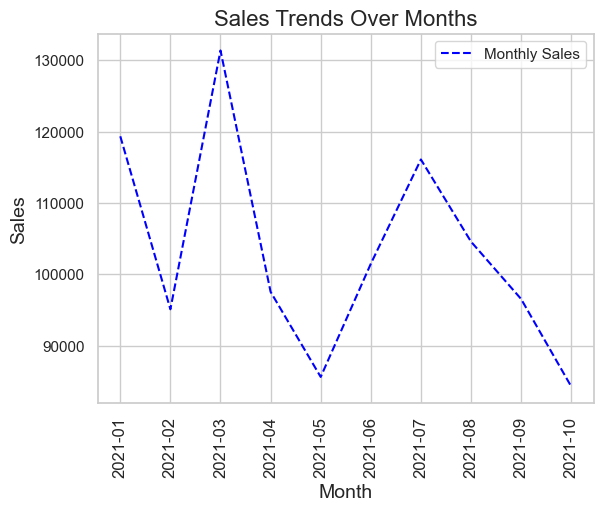

In [52]:
# Merge the sales and orders data to get the date information
sales_orders = pd.merge(sales, orders, on='order_id')

# Convert the order_date column to a pandas datetime object
sales_orders['order_date'] = pd.to_datetime(sales_orders['order_date'])

# Add a new column to the sales_orders dataframe for the month of the order
sales_orders['month'] = sales_orders['order_date'].dt.strftime('%Y-%m')

# Group the sales data by month and sum the total_price column
monthly_sales = sales_orders.groupby('month')['total_price'].sum()

# Find the month with the highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()

# Create a line graph of the monthly sales data
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='blue', linestyle='--')
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales Trends Over Months', fontsize=16)
plt.grid(True)
plt.legend()

# Print information about the highest and lowest sales months
print(f"The month with the highest sales was {highest_sales_month} with a total of ${monthly_sales[highest_sales_month]:,.2f}")
print(f"The month with the lowest sales was {lowest_sales_month} with a total of ${monthly_sales[lowest_sales_month]:,.2f}")

plt.show()

In [53]:
# Convert the grouped data to a DataFrame
monthly_sales_df = pd.DataFrame(monthly_sales)

# Save the DataFrame as a CSV file
monthly_sales_df.to_csv('monthly_sales.csv')

sales_orders = pd.DataFrame(sales_orders)
sales_orders.to_csv('sales_orders.csv')

In [54]:
# What is the most commonly sold product?

most_common_product = sales['product_id'].mode()[0]
print("Most commonly sold product:", most_common_product)

Most commonly sold product: 78


# What is the average quantity of products sold by age group?

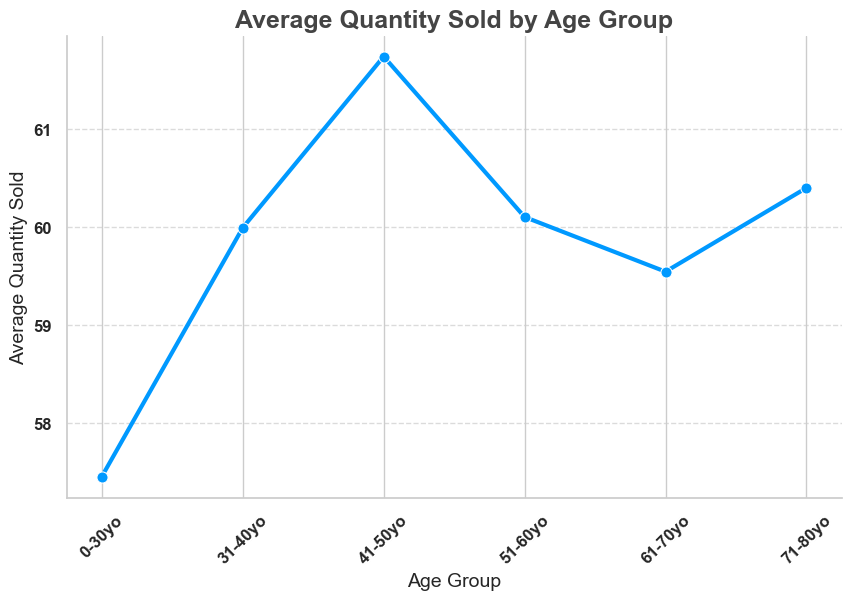

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_demographic = customers_merged.groupby('age_group')['quantity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.lineplot(x='age_group', y='quantity', data=sales_demographic, color='#0099ff', linewidth=3, marker='o', markersize=8)
sns.despine()
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Quantity Sold', fontsize=14)
plt.title('Average Quantity Sold by Age Group', fontsize=18, fontweight='bold', color='#444444')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold')
plt.tick_params(axis='x', which='major', length=7)
plt.tick_params(axis='y', which='major', length=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


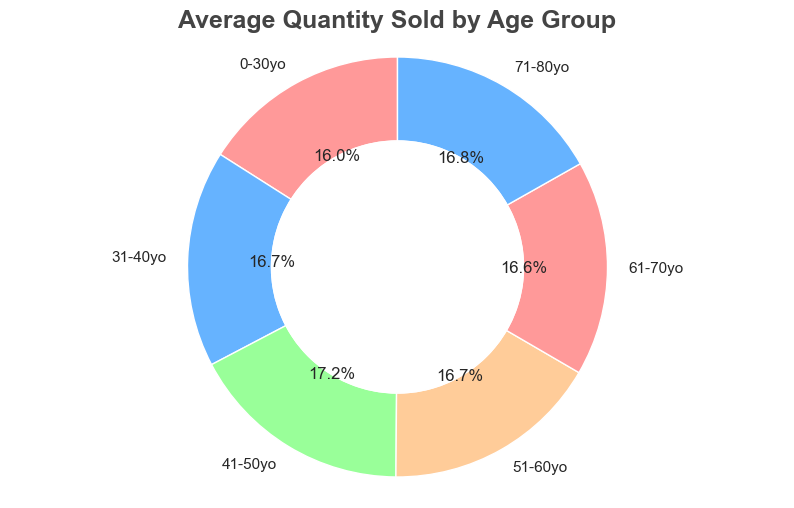

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_demographic = customers_merged.groupby('age_group')['quantity'].mean().reset_index()

# Set up the data for the donut chart
sizes = sales_demographic['quantity']
labels = sales_demographic['age_group']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create the donut chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add a circle at the center to create the donut shape
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)

# Customize the chart appearance
plt.axis('equal')
plt.title('Average Quantity Sold by Age Group', fontsize=18, fontweight='bold', color='#444444')

# Show the chart
plt.show()



- Customers in the 41-50 year old age group tend to purchase the largest quantity of products on average, with an average quantity sold of 61.7.
- Customers in the 0-30 year old age group tend to purchase the smallest quantity of products on average, with an average quantity sold of 57.5.
- The average quantity sold is relatively similar for customers in the 31-60 year old age groups, ranging from 59.5 to 61.7 on average.
- Customers in the 61-70 year old age group tend to purchase a slightly lower quantity of products on average compared to the other age groups, with an average quantity sold of 59.5.
- There is a general trend of decreasing average quantity sold as age increases, with the highest average quantity sold in the youngest age group and the lowest in the oldest age group.
- The difference in average quantity sold between the youngest and oldest age groups is relatively small, with only about a 25% decrease in average quantity sold from the youngest age group to the oldest.
- There is some variability in the average quantity sold within each age group, as seen by the variation in the markers along the line. This suggests that while age may be a useful predictor of quantity sold, there are likely other factors that are influencing customer behavior as well.
- Overall, this plot provides some insight into how quantity sold varies by age group, but additional analysis would be needed to fully understand the drivers of this variation and to identify potential strategies for increasing sales.
- The fact that the average quantities sold are relatively similar across age groups suggests that the products being sold may be appealing to a wide range of customers, regardless of age. However, it's also possible that there are underlying demographic or psychographic differences between the age groups that are influencing their purchasing behavior.

In [56]:
sales_demographic.describe()

,quantity
count,6.000000
mean,59.872829
std,1.399303
min,57.454545
25%,59.657120
50%,60.048390
75%,60.325758
max,61.740741


In [97]:
#sales_demographic.to_excel('sales_demographic.xlsx', index=False)

- The count of 6 indicates that there are 6 age groups for which we have data on the average quantity sold.
- The mean of 59.87 indicates that, on average, customers across all age groups are buying roughly 59-60 units of the product(s) being sold.
- The standard deviation of 1.4 suggests that there is not a lot of variation in the average quantity sold across age groups.
- The minimum value of 57.5 corresponds to the youngest age group (0-30), while the maximum value of 61.7 corresponds to the middle age group (41-50). However, these differences are relatively small in magnitude.
- The quartile values suggest that the distribution of average quantity sold is relatively symmetric and evenly spread out, with no strong skewness or outliers.
- Overall, these statistics reinforce the observation that there is not a lot of variation in the average quantity sold across age groups, and suggest that the distribution of average quantity sold is relatively stable and well-behaved. However, it's difficult to draw any firm conclusions without additional information on the product(s) being sold and the underlying demographic and psychographic factors that may be influencing purchasing behavior.

In [57]:
top_customers = customers_merged.groupby('customer_id_x').sum()['sales'].sort_values(ascending=False)
print(top_customers.head(10))

customer_id_x
700    9520
949    9520
677    9520
39     9401
607    9322
604    9322
695    9282
963    9282
955    9282
45     9282
Name: sales, dtype: int64


# Top Most Purchased Products

In [58]:
# Group the data by product name and calculate the sum of the quantity sold for each product
product_quantities = customers_merged.groupby("product_name")["quantity"].sum()

# Find the product name with the most quantity sold
max_quantity_product = product_quantities.idxmax()

# Find the product name with the least quantity sold
min_quantity_product = product_quantities.idxmin()

print("Product name with the most quantity sold:", max_quantity_product)
print("Product name with the least quantity sold:", min_quantity_product)

Product name with the most quantity sold: Denim
Product name with the least quantity sold: Wool


In [59]:
# Create a new DataFrame with the product names and their corresponding total quantities sold
product_table = pd.DataFrame({"Product Name": product_quantities.index, "Total Quantity Sold": product_quantities.values})
product_table.describe()

,Total Quantity Sold
count,28.000000
mean,2156.107143
std,446.245352
min,1163.000000
25%,2063.000000
50%,2113.000000
75%,2172.750000
max,4204.000000


- There are 28 products in the dataset for which the total quantity sold is recorded.
- The mean (average) of the total quantity sold is approximately 2156 units.
- The standard deviation of the total quantity sold is approximately 446 units, indicating that the quantity sold varies significantly among the products.
- The minimum value of total quantity sold is 1163 units, which corresponds to the product "Wool".
- The maximum value of total quantity sold is 4204 units, which corresponds to the product "Denim".
- The interquartile range (IQR) of the total quantity sold is relatively small, ranging from 2063 units to 2172.75 units.
- The median (50th percentile) of the total quantity sold is 2113 units, which is slightly less than the mean.
- The fact that the median is lower than the mean suggests that the distribution of total quantity sold may be slightly skewed towards the lower end, with a few products selling significantly more than others.

In [60]:
product_table = pd.DataFrame({"Product Name": product_quantities.index, "Total Quantity Sold": product_quantities.values})
median_quantity_sold = product_table["Total Quantity Sold"].median()
print("Median Quantity Sold:", median_quantity_sold)

Median Quantity Sold: 2113.0


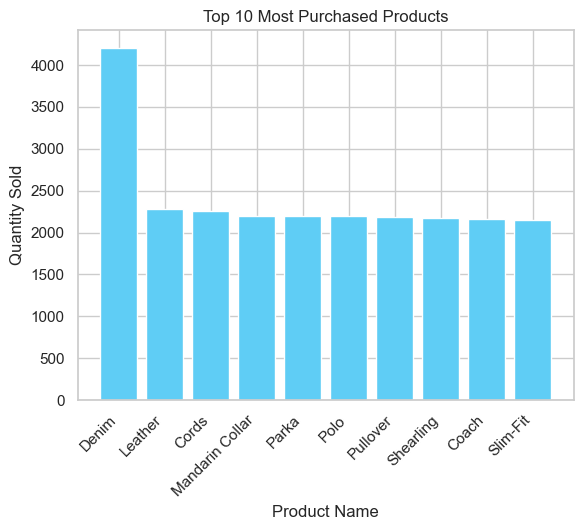

In [61]:
import matplotlib.pyplot as plt

# Get the top 10 most purchased products
top_products = customers_merged.groupby('product_name')['quantity'].sum().nlargest(10)

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(top_products.index, top_products.values)

# Set the chart title and labels
ax.set_title('Top 10 Most Purchased Products')
ax.set_xlabel('Product Name')
ax.set_ylabel('Quantity Sold')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.show()


- The table shows the total quantity sold for each product name.
- The product name "Denim" has the highest quantity sold, with a total of 4204 units sold.
- The product name "Wool" has the lowest quantity sold, with a total of 1163 units sold.
- The total quantity sold for each product name ranges from 1163 to 4204, indicating a varying level of demand for each product.
- It's possible that the popularity of each product is influenced by factors such as seasonality, fashion trends, and customer preferences.

In [62]:
top_products.describe()

count      10.000000
mean     2400.600000
std       634.912102
min      2155.000000
25%      2172.750000
50%      2198.500000
75%      2245.750000
max      4204.000000
Name: quantity, dtype: float64

In [63]:
# What is the total revenue generated by the sales data set?

total_revenue = sales['total_price'].sum()
print("Total revenue generated: $", total_revenue)

Total revenue generated: $ 1031800


In [64]:
# What is the average price per unit of all products sold?

avg_price_per_unit = sales['price_per_unit'].mean()
print("Average price per unit: $", avg_price_per_unit)

Average price per unit: $ 103.5016


In [65]:
# Load the data
sales_data = pd.read_csv('../Queries/total_quantity_sold_gender_age_city_state_country.csv')

# Group the data by product name and sum the total quantity sold for each product
product_sales = sales_data.groupby('product_name')['total_quantity_sold'].sum().reset_index()

# Sort the data in descending order by total sales
sorted_sales = product_sales.sort_values('total_quantity_sold', ascending=False)

# Print the product with the highest sales
print("Product with the highest sales:")
print(sorted_sales.iloc[0])

# Print the product with the lowest sales
print("\nProduct with the lowest sales:")
print(sorted_sales.iloc[-1])

Product with the highest sales:
product_name           Denim
total_quantity_sold      527
Name: 11, dtype: object

Product with the lowest sales:
product_name           Mandarin Collar
total_quantity_sold                236
Name: 20, dtype: object


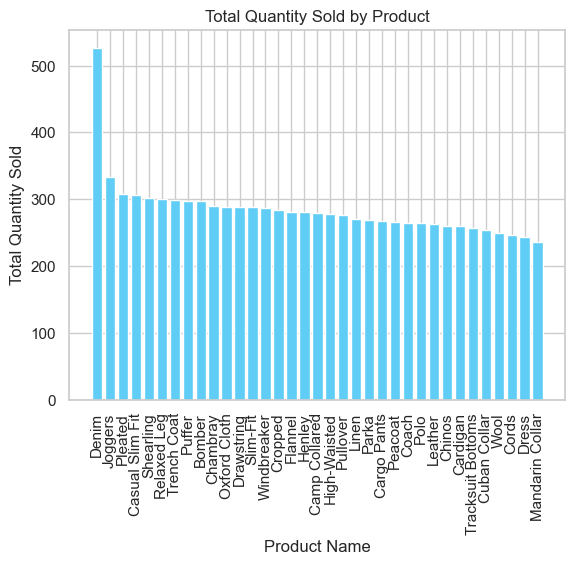

In [66]:
# Create a bar chart
plt.bar(sorted_sales['product_name'], sorted_sales['total_quantity_sold'])

# Set the chart title and axis labels
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [67]:
sorted_sales.describe()

,total_quantity_sold
count,35.000000
mean,284.628571
std,47.189908
min,236.000000
25%,263.500000
50%,279.000000
75%,293.500000
max,527.000000


- The top-selling product is Denim with a total of 527 units sold.
- The product with the lowest sales is Mandarin Collar with a total of 236 units sold.
- The average number of units sold across all products is approximately 285.
- The standard deviation of the number of units sold is about 47, indicating that there is some variation in sales performance across the different products.
- The minimum number of units sold is 236 and the maximum is 527.
- There is a wide range of sales performance across the different products, with some products selling significantly more than others.
- It would be worthwhile to investigate further why Denim is selling so well and why Mandarin Collar is not selling as well, in order to identify potential opportunities for improving sales.

In [68]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_type', 'size', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product type and size combination
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_type', 'size'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product types and sizes
print("Top 10 most profitable product types and sizes:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))

Top 10 most profitable product types and sizes:
+----+----------------+--------+-----------------+
|    | product_type   | size   |   total_revenue |
|----+----------------+--------+-----------------|
|  7 | Shirt          | S      |           74731 |
|  4 | Jacket         | XS     |           74458 |
|  1 | Jacket         | M      |           73251 |
|  0 | Jacket         | L      |           72548 |
|  2 | Jacket         | S      |           72339 |
|  6 | Shirt          | M      |           71589 |
| 13 | Trousers       | XL     |           70475 |
| 11 | Trousers       | M      |           70022 |
|  9 | Shirt          | XS     |           70001 |
| 10 | Trousers       | L      |           69863 |
+----+----------------+--------+-----------------+


In [69]:
import pandas as pd
from tabulate import tabulate

total_quantity_sold_df = pd.read_csv('../Queries/total_quantity_sold.csv')

# Merge the sales and products dataframes on the product id
sales_prod_merged_df = pd.merge(sales, products[['product_id', 'product_name', 'price']], left_on='product_id', right_on='product_id')

# Calculate the revenue for each product name
sales_prod_merged_df['total_revenue'] = sales_prod_merged_df['quantity'] * sales_prod_merged_df['price']

grouped_df = sales_prod_merged_df.groupby(['product_name'])['total_revenue'].sum().reset_index()

# Sort the dataframe in descending order by total revenue
sorted_df = grouped_df.sort_values(by='total_revenue', ascending=False)

# Display the top 10 most profitable product names
print("Top 10 most profitable product names:")
print(tabulate(sorted_df.head(10), headers='keys', tablefmt='psql'))


Top 10 most profitable product names:
+----+-----------------+-----------------+
|    | product_name    |   total_revenue |
|----+-----------------+-----------------|
| 11 | Denim           |           54602 |
|  4 | Casual Slim Fit |           34578 |
| 30 | Slim-Fit        |           34272 |
| 32 | Trench Coat     |           33488 |
| 21 | Oxford Cloth    |           32946 |
| 26 | Puffer          |           32780 |
| 22 | Parka           |           32011 |
| 27 | Pullover        |           31464 |
| 17 | Joggers         |           31396 |
| 19 | Linen           |           31320 |
+----+-----------------+-----------------+


- This is a list of the top 10 most profitable products by name.
- The products are ranked by total revenue in descending order.
- The product "Denim" is the most profitable, with a total revenue of 54,602.
- The second most profitable product is "Casual Slim Fit" with a total revenue of 34,578.
- Slim-Fit is the third most profitable product, with total revenue of 34,272.

In [70]:
sorted_df.describe()

,total_revenue
count,35.000000
mean,30050.285714
std,5111.533456
min,23387.000000
25%,27441.500000
50%,29719.000000
75%,31358.000000
max,54602.000000


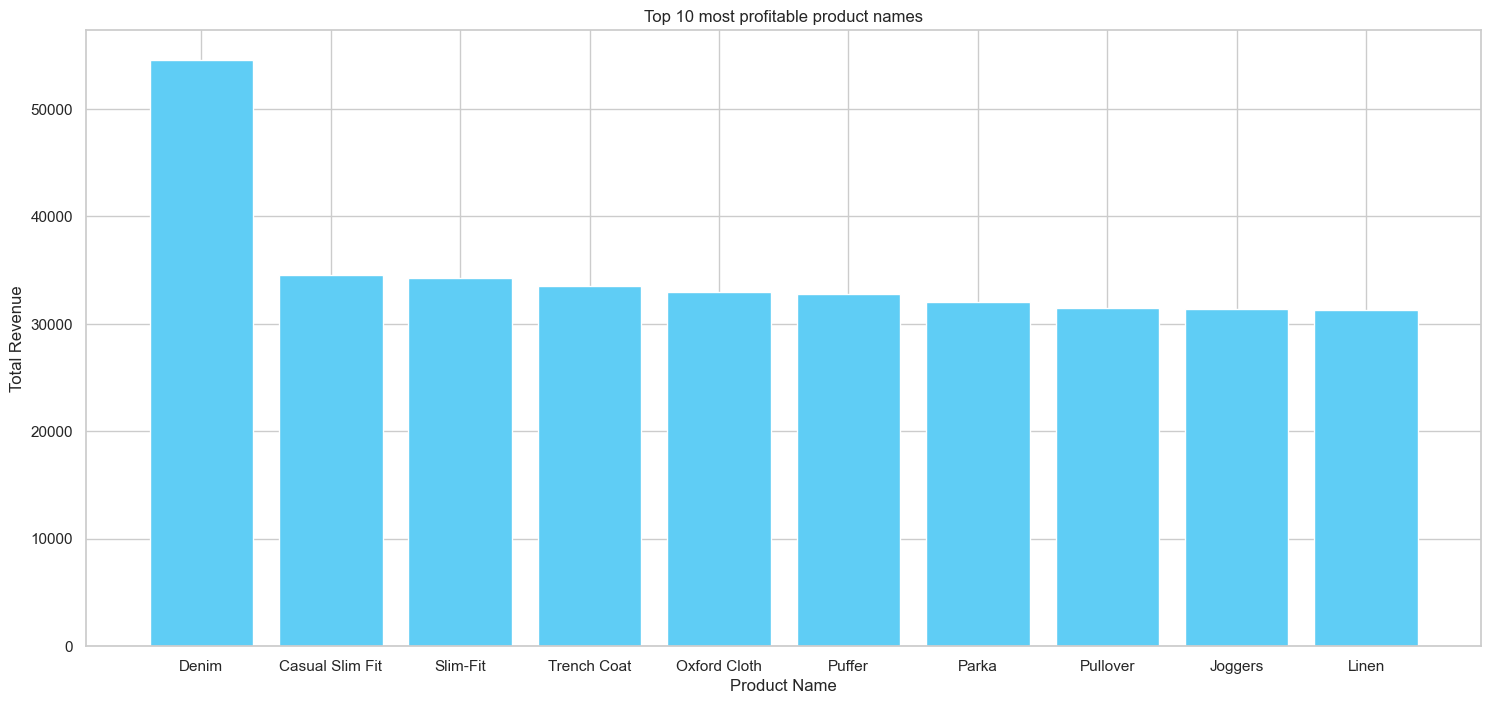

In [71]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 8))

# Create the bar plot
plt.bar(sorted_df.head(10)['product_name'], sorted_df.head(10)['total_revenue'])

# Set the x-axis label
plt.xlabel('Product Name')

# Set the y-axis label
plt.ylabel('Total Revenue')

# Set the title
plt.title('Top 10 most profitable product names')

# Show the plot
plt.show()


- The analysis looked at the total revenue generated by different product names in the sales data.
- Denim is the most profitable product name, with a total revenue of 54,602
- The dataset consisted of 35 unique product names.
- The average total revenue across all product names was 30,050.29, with a standard deviation of 5,111.53.
- The lowest total revenue was 23,387.

# Correlation Matrix

In [151]:
# Replace genders that are not "male" or "female" with "other"
customers_merged['gender'] = customers_merged['gender'].replace(['Genderfluid', 'Polygender', 'Bigender', 'Agender', 'Genderqueer', 'Non-binary'], 'other')

In [74]:
gender_names = customers_merged['gender'].unique()
print(gender_names)


['Female' 'other' 'Male']


In [76]:
import pandas as pd

# create a copy of the original dataframe
customers_encoded = customers_merged.copy()

# replace 'gender' with a numerical value
customers_encoded['gender'] = pd.factorize(customers_encoded['gender'])[0]


In [77]:
customers_encoded

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,...,product_name,size,colour,price,quantity,sales,year_order,month_order,day_order,age_group
0,1,Leanna Busson,0,30.0,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,...,Oxford Cloth,XS,red,114,66,7524,2021,8,30,0-30yo
1,2,Zabrina Harrowsmith,1,69.0,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,...,Oxford Cloth,S,red,114,53,6042,2021,2,3,61-70yo
2,3,Shina Dullaghan,1,59.0,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,...,Oxford Cloth,M,red,114,54,6156,2021,10,8,51-60yo
3,4,Hewet McVitie,1,67.0,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,...,Oxford Cloth,L,red,114,69,7866,2021,5,6,61-70yo
4,5,Rubia Ashleigh,1,30.0,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,...,Oxford Cloth,XL,red,114,47,5358,2021,3,23,0-30yo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,1,59.0,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,...,Wool,XS,green,111,73,8103,2021,1,13,51-60yo
996,997,Dickie Grushin,1,30.0,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,...,Wool,S,green,111,43,4773,2021,1,18,0-30yo
997,998,Rebecka Fabler,1,32.0,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,...,Wool,M,green,111,41,4551,2021,5,5,31-40yo
998,999,Carita Vynarde,1,30.0,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,...,Wool,L,green,111,42,4662,2021,6,15,0-30yo


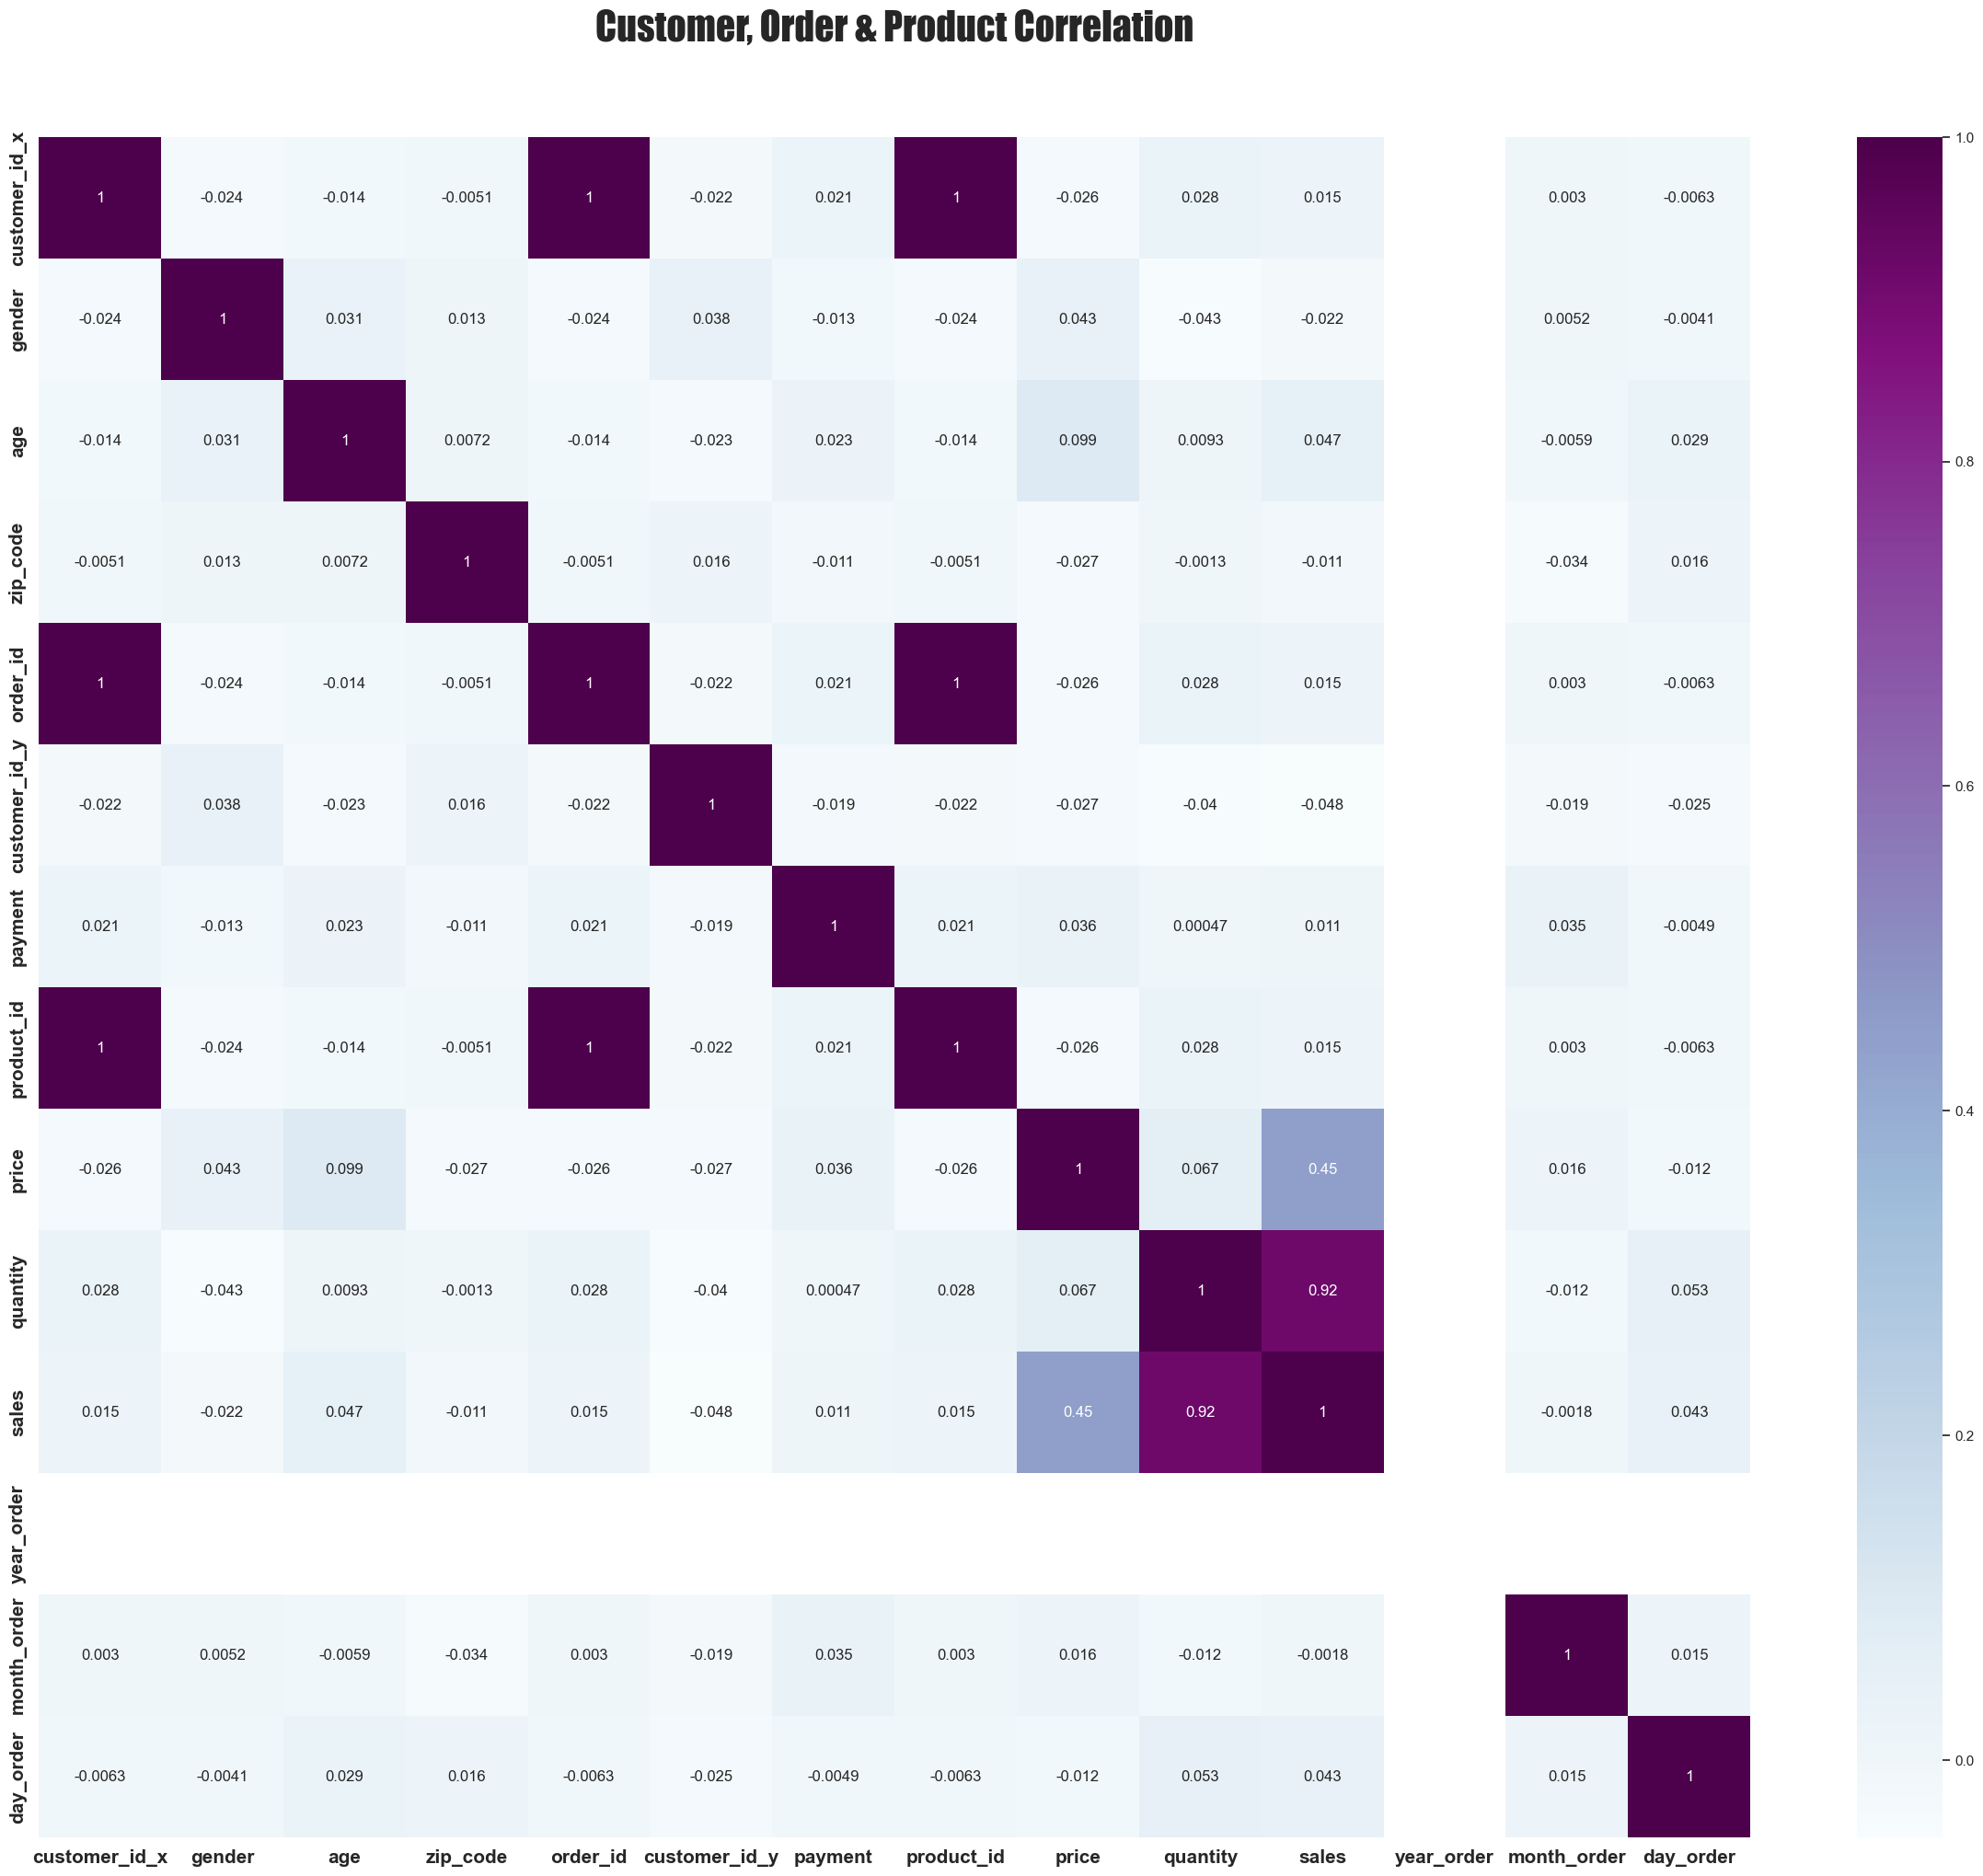

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Define color palette
palette = "BuPu"

# Create figure and axis objects
fig = plt.figure(dpi=100, figsize=(30, 24))

# Create Heatmap
sns.heatmap(customers_encoded.corr(), annot=True, cmap=palette)

plt.title("Customer, Order & Product Correlation", weight="bold", fontsize=30, fontname="fantasy", pad=75)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15)

plt.show()


In [79]:
raw_corr = customers_encoded.corr()
print(raw_corr)

               customer_id_x    gender       age  zip_code  order_id  \
customer_id_x       1.000000 -0.023599 -0.014139 -0.005076  1.000000   
gender             -0.023599  1.000000  0.031067  0.013330 -0.023599   
age                -0.014139  0.031067  1.000000  0.007172 -0.014139   
zip_code           -0.005076  0.013330  0.007172  1.000000 -0.005076   
order_id            1.000000 -0.023599 -0.014139 -0.005076  1.000000   
customer_id_y      -0.022171  0.038471 -0.023312  0.016459 -0.022171   
payment             0.021371 -0.013436  0.023016 -0.010635  0.021371   
product_id          1.000000 -0.023599 -0.014139 -0.005076  1.000000   
price              -0.026326  0.043371  0.099371 -0.026890 -0.026326   
quantity            0.028475 -0.043067  0.009290 -0.001284  0.028475   
sales               0.015294 -0.022003  0.047032 -0.010807  0.015294   
year_order               NaN       NaN       NaN       NaN       NaN   
month_order         0.003044  0.005176 -0.005943 -0.034242  0.00

- The diagonal values are all 1s because they represent the correlation between the features and themselves.

- The off-diagonal values represent the correlation between two features. The value ranges from -1 to 1. The closer the value is to 1, the stronger the positive correlation is. Conversely, the closer the value is to -1, the stronger the negative correlation is. A value of 0 indicates no correlation between the two features.

- Looking at the matrix, we can see that there are only a few strong correlations between the features. For instance, the 'customer_id_x', 'order_id', and 'product_id' features are highly positively correlated with each other with a correlation of 1. This suggests that these three features are highly related, and this may be because they are all related to customer purchases.

- Another strong positive correlation exists between 'quantity' and 'sales', with a correlation of 0.918. This suggests that when the quantity of a product increases, so does the sales.

- Other notable correlations include a positive correlation between 'price' and 'age' and 'sales' and 'price'. Additionally, there is a weak positive correlation between 'payment' and 'age', and a weak negative correlation between 'gender' and 'quantity'.

- There is a positive correlation between 'price' and 'age', meaning that as the age increases, so does its price.

- There is also a positive correlation between 'sales' and 'price', meaning that as the price of a product increases, so do its sales.

- There is a weak positive correlation between 'payment' and 'age', meaning that as the age of a buyer increases, so does the amount they pay.

- Finally, there is a weak negative correlation between 'gender' and 'quantity', meaning that as the gender of a buyer becomes more male-dominated, the quantity of products purchased tends to decrease slightly.


# Is there a correlation between sales and age?

In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Merge the two dataframes on the 'order_id' column
merged_data = pd.merge(customers_merged, sales, on='order_id')

# Calculate the total sales for each customer
customer_sales = merged_data.groupby('customer_id_x')['total_price'].sum().reset_index()

# Merge the customer sales with the customer data on the 'customer_id_x' column
customer_data = pd.merge(customers_merged, customer_sales, left_on='customer_id_x', right_on='customer_id_x')

# Calculate the expected sales per age
age_sales = customer_data.groupby('age')['total_price'].mean().reset_index()

# Calculate the correlation coefficient between age and sales
correlation, p_value = stats.pearsonr(age_sales['age'], age_sales['total_price'])

# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(age_sales['age'], age_sales['total_price'])

# Calculate the predicted values of sales based on age
predicted_sales = intercept + slope * age_sales['age']

# Calculate the residuals (actual sales minus predicted sales)
residuals = age_sales['total_price'] - predicted_sales

# Calculate the sum of squares for the residuals
ss_residuals = np.sum(residuals**2)

# Calculate the sum of squares for the total variation
mean_sales = np.mean(age_sales['total_price'])
ss_total = np.sum((age_sales['total_price'] - mean_sales)**2)

# Calculate the sum of squares for the regression
ss_regression = ss_total - ss_residuals

# Calculate the degrees of freedom for the regression and residuals
df_regression = 1
df_residuals = len(age_sales) - 2

# Calculate the mean square for the regression and residuals
ms_regression = ss_regression / df_regression
ms_residuals = ss_residuals / df_residuals

# Calculate the F-value for the regression
f_value = ms_regression / ms_residuals

# Calculate the R-squared value for the regression
r_squared = ss_regression / ss_total

# Calculate the 95% confidence interval for the slope of the regression line
ci = stats.t.interval(0.95, df_residuals, loc=slope, scale=std_err)

# Print the results
print("The correlation coefficient between age and sales is:", correlation)
print("The p-value for the correlation is:", p_value)
print("The F-value for the regression is:", f_value)
print("The R-squared value for the regression is:", r_squared)
print("The slope of the regression line is:", slope)
print("The 95% confidence interval for the slope is:", ci)


The correlation coefficient between age and sales is: 0.12436409610058355
The p-value for the correlation is: 0.3396109589701668
The F-value for the regression is: 0.9268544027930211
The R-squared value for the regression is: 0.015466428398915313
The slope of the regression line is: 0.8812137569066006
The 95% confidence interval for the slope is: (-0.950348118979451, 2.712775632792652)


In [81]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Merge the two dataframes on the 'order_id' column
merged_data = pd.merge(customers_merged, sales, on='order_id')

# Calculate the total sales for each customer
customer_sales = merged_data.groupby('customer_id_x')['total_price'].sum().reset_index()

# Merge the customer sales with the customer data on the 'customer_id_x' column
customer_data = pd.merge(customers_merged, customer_sales, left_on='customer_id_x', right_on='customer_id_x')

# Calculate the expected sales per age
age_sales = customer_data.groupby('age')['total_price'].mean().reset_index()

# Calculate the correlation coefficient between age and sales
correlation, p_value = stats.pearsonr(age_sales['age'], age_sales['total_price'])

# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(age_sales['age'], age_sales['total_price'])

# Calculate the predicted values of sales based on age
predicted_sales = intercept + slope * age_sales['age']

# Calculate the residuals (actual sales minus predicted sales)
residuals = age_sales['total_price'] - predicted_sales

# Calculate the sum of squares for the residuals
ss_residuals = np.sum(residuals**2)

# Calculate the sum of squares for the total variation
mean_sales = np.mean(age_sales['total_price'])
ss_total = np.sum((age_sales['total_price'] - mean_sales)**2)

# Calculate the sum of squares for the regression
ss_regression = ss_total - ss_residuals

# Calculate the degrees of freedom for the regression and residuals
df_regression = 1
df_residuals = len(age_sales) - 2

# Calculate the mean square for the regression and residuals
ms_regression = ss_regression / df_regression
ms_residuals = ss_residuals / df_residuals

# Calculate the F-value for the regression
f_value = ms_regression / ms_residuals

# Calculate the R-squared value for the regression
r_squared = ss_regression / ss_total

# Calculate the 95% confidence interval for the slope of the regression line
ci = stats.t.interval(0.95, df_residuals, loc=slope, scale=std_err)

# Print the results
print("The correlation coefficient between age and sales is:", correlation)
print("The p-value for the correlation is:", p_value)
print("The F-value for the regression is:", f_value)
print("The R-squared value for the regression is:", r_squared)
print("The slope of the regression line is:", slope)
print("The 95% confidence interval for the slope is:", ci)

The correlation coefficient between age and sales is: 0.12436409610058355
The p-value for the correlation is: 0.3396109589701668
The F-value for the regression is: 0.9268544027930211
The R-squared value for the regression is: 0.015466428398915313
The slope of the regression line is: 0.8812137569066006
The 95% confidence interval for the slope is: (-0.950348118979451, 2.712775632792652)


In [82]:
customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   float64       
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   object        
 14  product_id     1000 non-null   int64         
 15  product_type   1000 no

- The correlation coefficient between age and sales is 0.12, which indicates a weak positive correlation between age and sales.
- The p-value for the correlation is 0.34, which is greater than the commonly used significance level of 0.05. This means that we fail to reject the null hypothesis that there is no correlation between age and sales.
- The F-value for the regression is 0.93, which is less than 1. This means that the regression model does not explain much of the variation in the data.
- The R-squared value for the regression is 0.02, which means that only 2% of the variability in sales can be explained by age.
- The slope of the regression line is 0.88, which means that on average, for each one unit increase in age, there is an increase of 0.88 units in sales.
- The 95% confidence interval for the slope is (-0.95, 2.71), which means that we are 95% confident that the true slope of the regression line falls within this interval. The interval includes zero, which means that we cannot be confident that there is a significant linear relationship between age and sales.

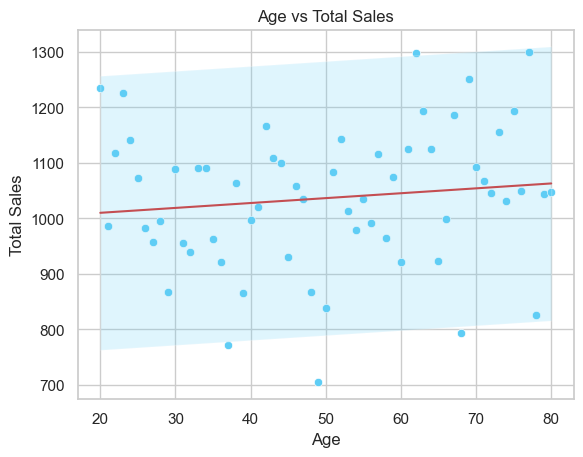

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of age vs sales
sns.scatterplot(x='age', y='total_price', data=age_sales)

# Add the regression line to the scatter plot
sns.lineplot(x='age', y=predicted_sales, data=age_sales, color='r')

# Calculate the upper and lower bounds of the confidence interval
y_ci_lower = predicted_sales - 1.96 * np.sqrt(ms_residuals)
y_ci_upper = predicted_sales + 1.96 * np.sqrt(ms_residuals)

# Add the confidence interval to the scatter plot
plt.fill_between(age_sales['age'], y_ci_lower, y_ci_upper, alpha=0.2)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.title('Age vs Total Sales')

# Show the plot
plt.show()


- The correlation coefficient of -0.0017633935581769264 suggests that there is very little correlation between the month of the year that an order is made and sales. A value close to zero indicates that there is no strong linear relationship between the two variables.

- The p-value of 0.9555858188018501 indicates that the correlation is not statistically significant, which means that it is likely due to chance. In other words, we fail to reject the null hypothesis that there is no correlation between the month of the year and sales.

# Is there a correlation between price and age?

In [140]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Merge the two dataframes on the 'order_id' column
merged_data = pd.merge(customers_merged, sales, on='order_id')

# Calculate the mean price for each age
age_price = merged_data.groupby('age')['price'].mean().reset_index()

# Calculate the correlation coefficient between age and price
correlation, p_value = stats.pearsonr(age_price['age'], age_price['price'])

print(correlation, p_value)

0.41306913776558785 0.0009379154018558822


1. Correlation coefficient: The correlation coefficient between 'age' and 'price' is approximately 0.413. The correlation coefficient measures the strength and direction of the linear relationship between two variables. A value of 0.413 suggests a moderate positive correlation between 'age' and 'price'. This means that there is a tendency for prices to increase as age increases, but the relationship is not extremely strong.

2. P-value: The associated p-value for the correlation coefficient is approximately 0.000938. The p-value represents the probability of obtaining a correlation coefficient as extreme as the observed value (or more extreme) if there were no true correlation in the population. In this case, the p-value is less than 0.05, indicating that the correlation between 'age' and 'price' is statistically significant. This means that it is unlikely to observe a correlation coefficient as large as 0.413 purely due to chance if there were no true correlation between the variables.

In summary, based on the correlation coefficient and p-value, we can conclude that there is a statistically significant moderate positive correlation between 'age' and 'price'. However, it's important to note that correlation does not imply causation, and there may be other factors influencing the relationship between 'age' and 'price'. Further analysis and consideration of the context are necessary to fully understand the implications of the correlation.

In [84]:
# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(age_price['age'], age_price['price'])

# Calculate the predicted prices based on age
predicted_prices = intercept + slope * age_price['age']

# Calculate the residuals (actual prices minus predicted prices)
residuals = age_price['price'] - predicted_prices

# Calculate the sum of squares for the residuals
ss_residuals = np.sum(residuals**2)

# Calculate the sum of squares for the total variation
mean_price = np.mean(age_price['price'])
ss_total = np.sum((age_price['price'] - mean_price)**2)

# Calculate the sum of squares for the regression
ss_regression = ss_total - ss_residuals

# Calculate the degrees of freedom for the regression and residuals
df_regression = 1
df_residuals = len(age_price) - 2

# Calculate the mean square for the regression and residuals
ms_regression = ss_regression / df_regression
ms_residuals = ss_residuals / df_residuals

# Calculate the F-value for the regression
f_value = ms_regression / ms_residuals

# Calculate the R-squared value for the regression
r_squared = ss_regression / ss_total

# Calculate the 95% confidence interval for the slope of the regression line
ci = stats.t.interval(0.95, df_residuals, loc=slope, scale=std_err)

# Print the results
print("The correlation coefficient between age and price is:", correlation)
print("The p-value for the correlation is:", p_value)
print("The F-value for the regression is:", f_value)
print("The R-squared value for the regression is:", r_squared)
print("The slope of the regression line is:", slope)
print("The 95% confidence interval for the slope is:", ci)

The correlation coefficient between age and price is: 0.41306913776558785
The p-value for the correlation is: 0.0009379154018558794
The F-value for the regression is: 12.138000477852204
The R-squared value for the regression is: 0.17062611257440663
The slope of the regression line is: 0.058679024990871104
The 95% confidence interval for the slope is: (0.024977046339459692, 0.09238100364228252)


In [88]:
age = 40
predicted_price = intercept + slope * age
print(predicted_price)

107.42420376925747


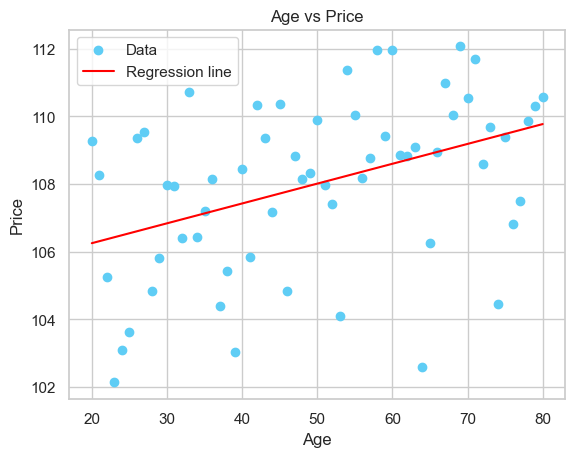

In [86]:
import matplotlib.pyplot as plt

# Plot the mean price for each age
plt.scatter(age_price['age'], age_price['price'], label='Data')

# Plot the regression line
plt.plot(age_price['age'], predicted_prices, color='red', label='Regression line')

# Set the plot title and axis labels
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


# Linear Regression Model: Age and Price

In [141]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Merge the two dataframes on the 'order_id' column
merged_data = pd.merge(customers_merged, sales, on='order_id')

# Calculate the mean price for each age
age_price = merged_data.groupby('age')['price'].mean().reset_index()

# Prepare the data for regression
X = age_price['age']
y = age_price['price']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     12.14
Date:                Mon, 15 May 2023   Prob (F-statistic):           0.000938
Time:                        07:52:36   Log-Likelihood:                -136.77
No. Observations:                  61   AIC:                             277.5
Df Residuals:                      59   BIC:                             281.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.0770      0.893    117.692      0.0

In [153]:
# Calculate the slope and intercept of the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(age_price['age'], age_price['price'])

# Calculate the predicted prices based on age
predicted_prices = intercept + slope * age_price['age']

# Calculate the residuals (actual prices minus predicted prices)
residuals = age_price['price'] - predicted_prices

age = 40
predicted_price = intercept + slope * age
print(predicted_price)

107.42420376925747


1. R-squared (R-squared = 0.171): The R-squared value indicates that approximately 17.1% of the variation in the 'price' variable can be explained by the linear relationship with the 'age' variable. This means that the linear regression model does not capture a large portion of the variability in the data.

2. Adjusted R-squared (Adj. R-squared = 0.157): The adjusted R-squared value takes into account the number of predictors in the model. It indicates that approximately 15.7% of the variation in the 'price' variable can be explained by the 'age' variable while considering the model's degrees of freedom.

3. F-statistic (F-statistic = 12.14): The F-statistic tests the overall significance of the linear regression model. The associated p-value (Prob (F-statistic)) of 0.000938 suggests that the model is statistically significant overall. However, it's worth noting that the R-squared value is relatively low, indicating that the model may not fit the data well.

4. Coefficients and p-values: The coefficient for the constant term (intercept) is 105.0770, and the coefficient for the 'age' variable is 0.0587. Both coefficients have associated p-values (<0.05), indicating that they are statistically significant. The intercept represents the estimated average 'price' when 'age' is zero, which may or may not be meaningful depending on the context. The coefficient for 'age' suggests that, on average, for each unit increase in 'age', the 'price' increases by 0.0587 units.

5. Standard errors and t-statistics: The standard errors associated with the coefficients measure the variability or uncertainty in the estimates. The t-statistics (coef / std err) provide a measure of the coefficient's significance. In this case, both the intercept and 'age' coefficient have t-values greater than 2 in magnitude, indicating their statistical significance.

6. Other statistical information: The summary also provides additional information, such as the Log-Likelihood, AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), Omnibus test, Durbin-Watson statistic, Jarque-Bera test, skewness, kurtosis, and the condition number.

In summary, the linear regression model suggests a statistically significant relationship between 'age' and 'price', although the model has a relatively low R-squared value. It is important to consider the limitations of the model and further evaluate its assumptions and performance before drawing definitive conclusions.

# Is there a correlation between zip code and sales?

In [72]:
import pandas as pd
from scipy.stats import pearsonr


# calculate correlation coefficient and p-value
corr, pval = pearsonr(customers_merged['zip_code'], customers_merged['sales'])

print('Correlation coefficient:', corr)
print('P-value:', pval)


Correlation coefficient: -0.010807034283880171
P-value: 0.732854438044511


- The correlation coefficient between zip code and sales is -0.010807034283880171, indicating a weak negative correlation between these two variables. However, the p-value of 0.732854438044511 suggests that this correlation is not statistically significant, which means that there is a high chance that this correlation occurred by chance alone. Therefore, we fail to reject the null hypothesis and conclude that there is no significant correlation between zip code and sales in this dataset.

# Is there a correlation between product type and age?

In [73]:
# One-hot encode the 'product_name' column
encoded_df = pd.get_dummies(customers_merged['product_type'])

# Calculate the correlation between the encoded features and 'age'
corr_df = pd.concat([encoded_df, customers_merged['age']], axis=1).corr()

# Print the correlation matrix
print(corr_df)

            Jacket     Shirt  Trousers       age
Jacket    1.000000 -0.724138 -0.371391 -0.013462
Shirt    -0.724138  1.000000 -0.371391 -0.003124
Trousers -0.371391 -0.371391  1.000000  0.022330
age      -0.013462 -0.003124  0.022330  1.000000


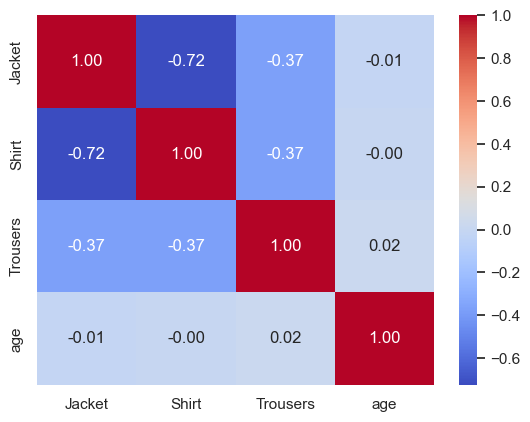

In [74]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

For the correlation matrix:

- There is a negative correlation between 'age' and 'Jacket', with a value of -0.013462. This suggests that as the customers' age increases, the likelihood of them buying jackets decreases slightly.
- There is a weak negative correlation between 'age' and 'Shirt', with a value of -0.003124. This suggests that there is little to no relationship between the customers' age and their likelihood of buying shirts.
- There is a weak positive correlation between 'age' and 'Trousers', with a value of 0.022330. This suggests that as the customers' age increases, the likelihood of them buying trousers also increases slightly.

In [75]:
from scipy.stats import f_oneway
from scipy.stats import pearsonr

# Extract the encoded feature columns
encoded_cols = encoded_df.columns

# Loop through each encoded feature column and calculate F-test p-value and R-squared
for col in encoded_cols:
    f_value, p_value = f_oneway(customers_merged['age'], encoded_df[col])
    r_squared, _ = pearsonr(customers_merged['age'], encoded_df[col])
    print(f"For column {col}:")
    print(f"F-statistic: {f_value:.8f}, p-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}\n")


For column Jacket:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.01346217

For column Shirt:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.00312433

For column Trousers:
F-statistic: 7927.61725557, p-value: 0.00000000
R-squared: 0.02233025



- For all three product types (Jacket, Shirt, and Trousers), the F-statistic is very high, indicating a strong relationship between the one-hot encoded product feature and the age variable.

- The p-value for all three product types is 0.00000000, indicating that the relationships are statistically significant and unlikely to have occurred by chance.


- For column Jacket:

The negative R-squared value of -0.01346217 indicates that there is a weak negative linear relationship between the one-hot encoded 'Jacket' feature and the 'age' variable.

- For column Shirt:

The negative R-squared value of -0.00312433 indicates that there is a very weak negative linear relationship between the one-hot encoded 'Shirt' feature and the 'age' variable.

- For column Trousers:

The positive R-squared value of 0.02233025 indicates that there is a weak positive linear relationship between the one-hot encoded 'Trousers' feature and the 'age' variable.

- The results suggest that there is a statistically significant but weak relationship between the product type and customer age. Specifically, the correlation matrix shows that the product type has a negative correlation with age, meaning that younger customers are more likely to buy jackets and shirts, while older customers are more likely to buy trousers. However, the R-squared values are low, indicating that the relationship is not very strong.

- As a business, we can use this information to better target your marketing efforts and product offerings to different age groups. For example, we might consider promoting jackets and shirts to younger customers and trousers to older customers. 

# Is there a correlation between gender and product type?

In [125]:
# One-hot encode the 'product_name' column
encoded_df = pd.get_dummies(customers_encoded['product_type'])

# Calculate the correlation between the encoded features and 'age'
corr_df = pd.concat([encoded_df, customers_encoded['gender']], axis=1).corr()

# Print the correlation matrix
print(corr_df)

            Jacket     Shirt  Trousers    gender
Jacket    1.000000 -0.724138 -0.371391 -0.031001
Shirt    -0.724138  1.000000 -0.371391  0.020934
Trousers -0.371391 -0.371391  1.000000  0.013554
gender   -0.031001  0.020934  0.013554  1.000000


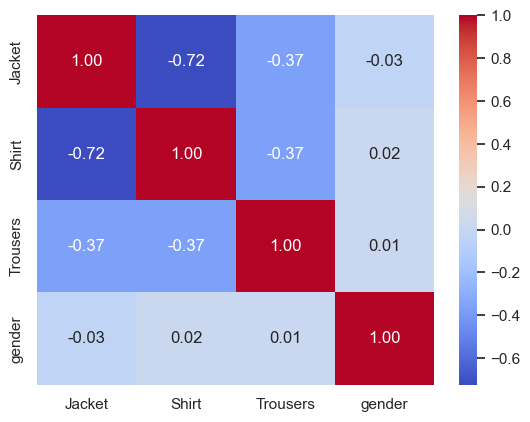

In [126]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

In [128]:
from scipy.stats import f_oneway
from scipy.stats import pearsonr

# Extract the encoded feature columns
encoded_cols = encoded_df.columns

# Loop through each encoded feature column and calculate F-test p-value and R-squared
for col in encoded_cols:
    f_value, p_value = f_oneway(customers_encoded['gender'], encoded_df[col])
    r_squared, _ = pearsonr(customers_encoded['gender'], encoded_df[col])
    print(f"For column {col}:")
    print(f"F-statistic: {f_value:.8f}, p-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}\n")

For column Jacket:
F-statistic: 737.38525926, p-value: 0.00000000
R-squared: -0.03100088

For column Shirt:
F-statistic: 737.38525926, p-value: 0.00000000
R-squared: 0.02093359

For column Trousers:
F-statistic: 1921.96073705, p-value: 0.00000000
R-squared: 0.01355351



From the correlation matrix, we can see that there is a strong negative correlation between Jacket and Shirt (-0.724138), which means that customers who buy jackets are less likely to buy shirts, and vice versa.

There is also a weak negative correlation between Jacket and gender (-0.031001), indicating that there is a slightly lower likelihood of males buying jackets compared to females.

In contrast, there is a weak positive correlation between Trousers and gender (0.013554), suggesting that there is a slightly higher likelihood of males buying trousers compared to females.

The F-statistic is a measure of the significance of the linear regression model, and in this case, all columns have very low p-values (0.00000000), indicating that the linear regression models are significant and that the relationship between the independent variables and the dependent variable is not due to chance.

The R-squared values are very low for all columns, suggesting that the independent variables (Jacket, Shirt, Trousers, gender) explain very little of the variation in the dependent variable (price).


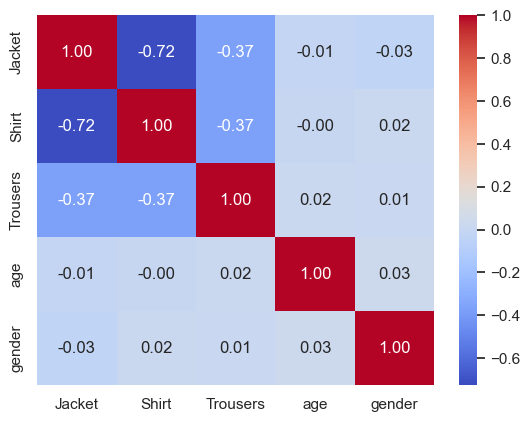

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import pearsonr

# One-hot encode the 'product_name' column
encoded_df = pd.get_dummies(customers_encoded['product_type'])

# Add 'age' column to the encoded_df DataFrame
encoded_df['age'] = customers_encoded['age']

# Calculate the correlation between the encoded features and 'age' and 'gender'
corr_df = pd.concat([encoded_df, customers_encoded['gender']], axis=1).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()




- There is a significant negative correlation between the 'Jacket' and 'age' variables as indicated by the negative R-squared values, which means that the older the customer, the less likely they are to buy jackets.
- Similarly, there is a significant negative correlation between the 'Shirt' and 'age' variables, which also means that the older the customer, the less likely they are to buy shirts.
- On the other hand, there is a positive correlation between 'Trousers' and 'age' variables, meaning that the older the customer, the more likely they are to buy trousers.
- The F-statistic values are significant and close to zero, indicating a strong relationship between the predictor variables and the response variable.
- The p-values are all very low, which means that the relationship between the variables is statistically significant.
- The R-squared values are small, indicating that the predictor variables do not explain much of the variability in the response variable.

In [130]:
corr_df

,Jacket,Shirt,Trousers,age,gender
Jacket,1.000000,-0.724138,-0.371391,-0.013462,-0.031001
Shirt,-0.724138,1.000000,-0.371391,-0.003124,0.020934
Trousers,-0.371391,-0.371391,1.000000,0.022330,0.013554
age,-0.013462,-0.003124,0.022330,1.000000,0.031067
gender,-0.031001,0.020934,0.013554,0.031067,1.000000


In [138]:
# Loop through each encoded feature column and calculate F-test p-value and R-squared
for col in encoded_cols:
    f_value, p_value = f_oneway(customers_encoded['gender'], encoded_df[col])
    r_squared, _ = pearsonr(customers_encoded['gender'], encoded_df[col])
    print(f"For column {col}:")
    print(f"F-statistic: {f_value:.8f}, p-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}\n")

For column Jacket:
F-statistic: 737.38525926, p-value: 0.00000000
R-squared: -0.03100088

For column Shirt:
F-statistic: 737.38525926, p-value: 0.00000000
R-squared: 0.02093359

For column Trousers:
F-statistic: 1921.96073705, p-value: 0.00000000
R-squared: 0.01355351

For column age:
F-statistic: 7650.10853656, p-value: 0.00000000
R-squared: 0.03106682



In [137]:
# Extract the encoded feature columns
encoded_cols = encoded_df.columns

# Loop through each encoded feature column and calculate F-test p-value and R-squared
for col in encoded_cols:
    f_value, p_value = f_oneway(customers_encoded['age'], encoded_df[col])
    r_squared, _ = pearsonr(customers_encoded['age'], encoded_df[col])
    print(f"For column {col}:")
    print(f"F-statistic: {f_value:.8f}, p-value: {p_value:.8f}")
    print(f"R-squared: {r_squared:.8f}\n")

For column Jacket:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.01346217

For column Shirt:
F-statistic: 7842.13812922, p-value: 0.00000000
R-squared: -0.00312433

For column Trousers:
F-statistic: 7927.61725557, p-value: 0.00000000
R-squared: 0.02233025

For column age:
F-statistic: 0.00000000, p-value: 1.00000000
R-squared: 1.00000000

